In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
places=["Barcelona, L'Eixample", "Paterna", "Málaga", "Bilbao, Parque Europa", "Cádiz", "Gijón", "Almería", "Palma", "Tenerife", "Cáceres, Toril", "Madrid, Plaza de España", "Albacete", "Burgos, Plaza lavaderos", "Zaragoza, Roger de la Flor", "Sevilla, La ranilla", "Valladolid, Arco de Ladrillo", "Badajoz", "Igualada, La Masuca (Barcelona)", "El Grao de Castellón", "Vigo, Estación 1, Avda Citröen"]
chems=["C6H6", "CO", "NO", "NOx", "NO2", "SO2", "PM10", "PM25", "O3"]
dic={"Urbanos Costeros": ["Barcelona, L'Eixample", "Paterna", "Málaga", "Bilbao, Parque Europa", "Cádiz", "Gijón", "Almería"], "Islas": ["Palma", "Tenerife"], "Rural": ["Cáceres, Toril"], "Urbanos Interior": ["Madrid, Plaza de España", "Albacete", "Burgos, Plaza lavaderos", "Zaragoza, Roger de la Flor", "Sevilla, La ranilla", "Valladolid, Arco de Ladrillo", "Badajoz"], "Industriales": ["Igualada, La Masuca (Barcelona)", "El Grao de Castellón", "Vigo, Estación 1, Avda Citröen"]}

In [4]:
df = pd.read_excel('Medias_trimestrales.xlsx')
df = df.fillna(0)

In [5]:
dfMM=df.groupby(pd.Grouper(key='Fecha', freq='Q')).mean()

In [6]:
dfMM = dfMM.reset_index()
dfMM = dfMM.rename(columns={'index': 'nueva_columna'})
fechas=dfMM.loc[:, "Fecha"]
dfMM['INDICE']=range(1,49)
dfMM

Fecha  Barcelona, L'Eixample/ C6H6  Barcelona, L'Eixample/ CO  \
0  2009-03-31                          0.0                   0.428122   
1  2009-06-30                          0.0                   0.342198   
2  2009-09-30                          0.0                   0.294576   
3  2009-12-31                          0.0                   0.485130   
4  2010-03-31                          0.0                   0.455456   
5  2010-06-30                          0.0                   0.305692   
6  2010-09-30                          0.0                   0.275326   
7  2010-12-31                          0.0                   0.425696   
8  2011-03-31                          0.0                   0.761589   
9  2011-06-30                          0.0                   0.660429   
10 2011-09-30                          0.0                   0.675913   
11 2011-12-31                          0.0                   0.748989   
12 2012-03-31                          0.0                   0.700440   
13 2012-06-30                          0.0                   0.602011   
14 2012-09-30                          0.0                   0.584946   
15 2012-12-31                          0.0                   0.683000   
16 2013-03-31                          0.0                   0.000000   
17 2013-06-30                          0.0                   0.000000   
18 2013-09-30                          0.0                   0.000000   
19 2013-12-31                          0.0                   0.000000   
20 2014-03-31                          0.0                   0.585233   
21 2014-06-30                          0.0                   0.562879   
22 2014-09-30                          0.0                   0.541609   
23 2014-12-31                          0.0                   0.641620   
24 2015-03-31                          0.0                   0.756978   
25 2015-06-30                          0.0                   0.655011   
26 2015-09-30                          0.0                   0.682880   
27 2015-12-31                          0.0                   1.101326   
28 2016-03-31                          0.0                   0.674198   
29 2016-06-30                          0.0                   0.649978   
30 2016-09-30                          0.0                   0.534750   
31 2016-12-31                          0.0                   0.786522   
32 2017-03-31                          0.0                   0.633922   
33 2017-06-30                          0.0                   0.583560   
34 2017-09-30                          0.0                   0.404848   
35 2017-12-31                          0.0                   0.556033   
36 2018-03-31                          0.0                   0.462978   
37 2018-06-30                          0.0                   0.449626   
38 2018-09-30                          0.0                   0.391565   
39 2018-12-31                          0.0                   0.454109   
40 2019-03-31                          0.0                   0.467733   
41 2019-06-30                          0.0                   0.344440   
42 2019-09-30                          0.0                   0.298957   
43 2019-12-31                          0.0                   0.342478   
44 2020-03-31                          0.0                   0.256132   
45 2020-06-30                          0.0                   0.240154   
46 2020-09-30                          0.0                   0.261837   
47 2020-12-31                          0.0                   0.326054   

    Barcelona, L'Eixample/ NO  Barcelona, L'Eixample/ NOx  \
0                   35.241844                  122.831911   
1                   20.068132                   94.232846   
2                   17.363315                   82.012272   
3                   47.315966                  135.188217   
4                   38.023652                  121.364100   
5                   30.855989                  121.250055   
6  

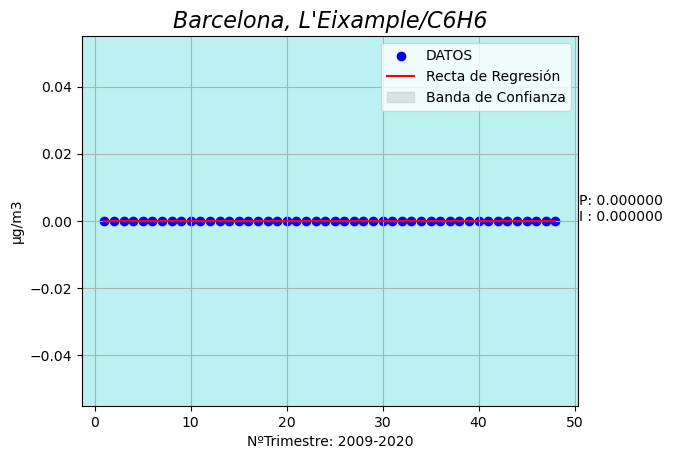

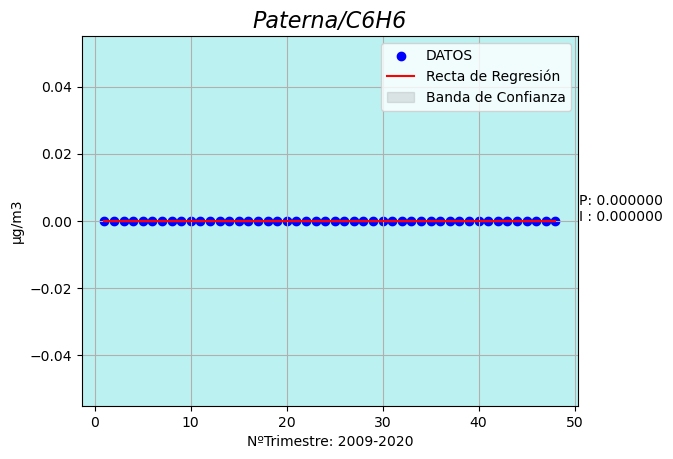

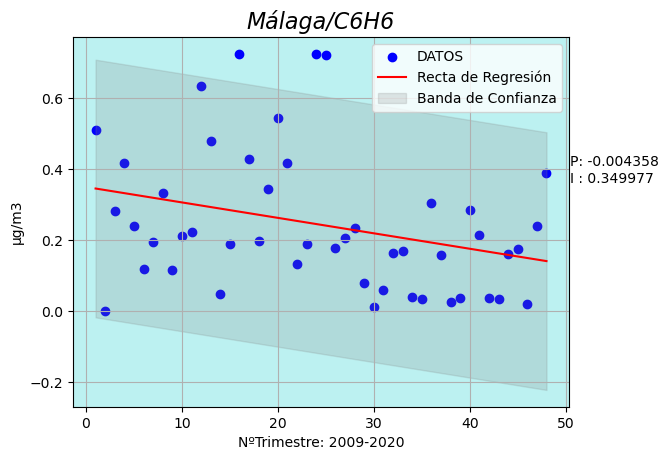

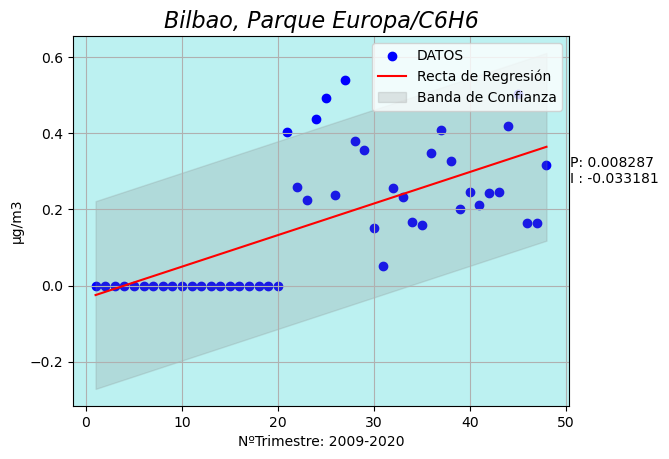

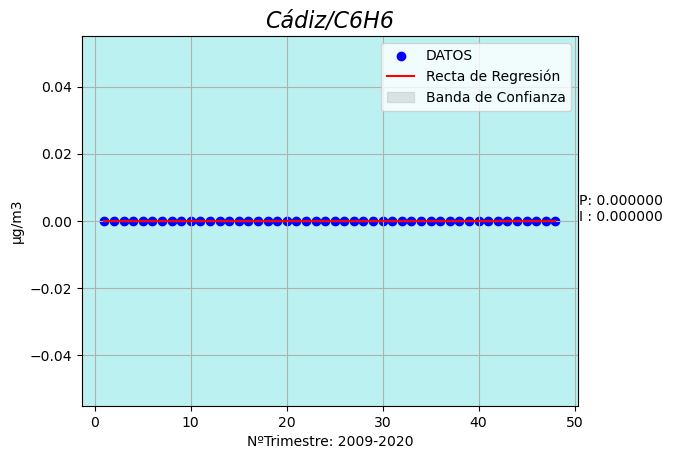

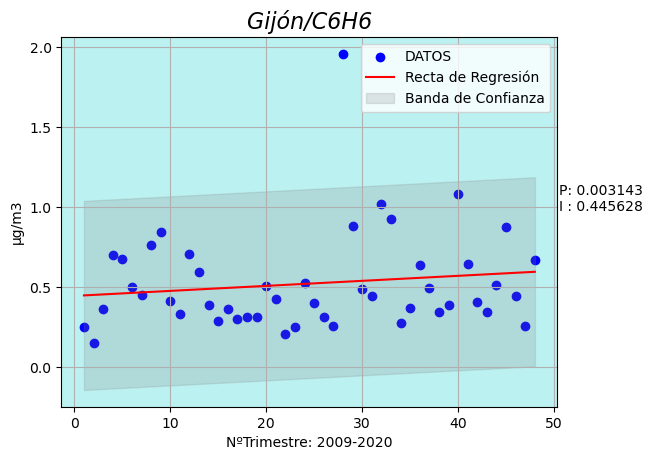

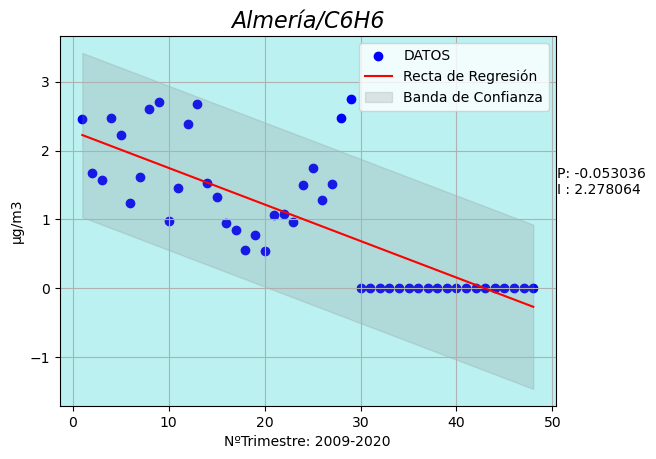

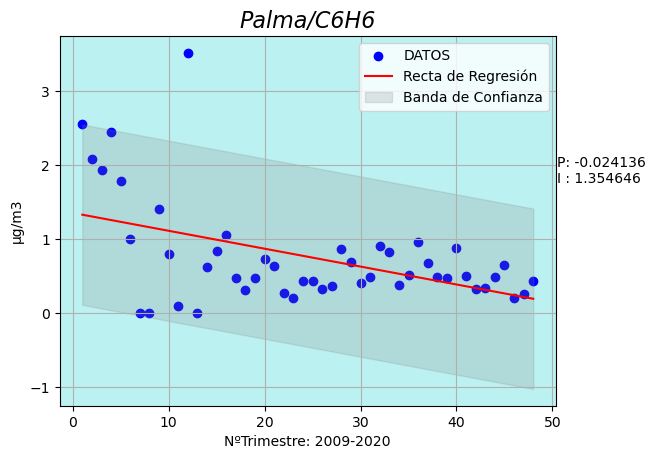

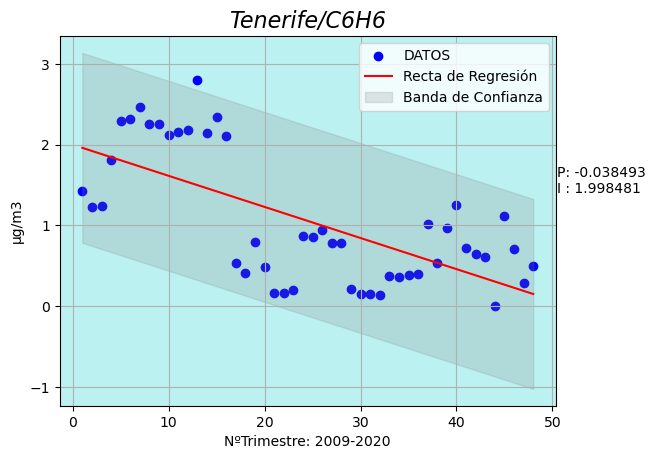

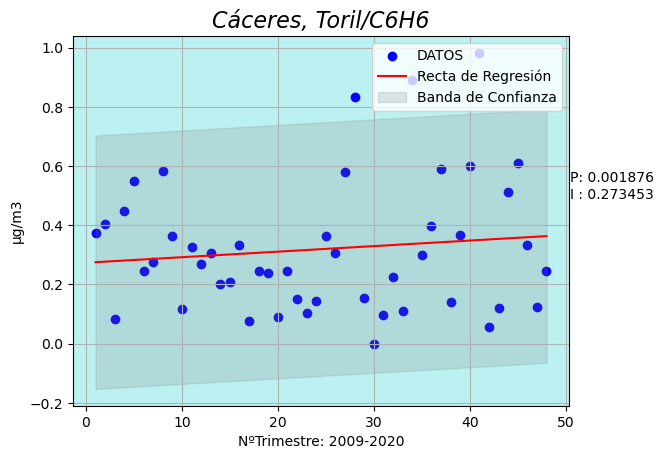

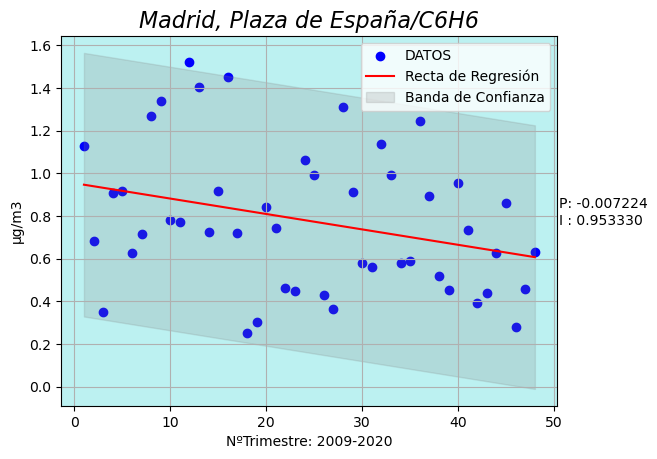

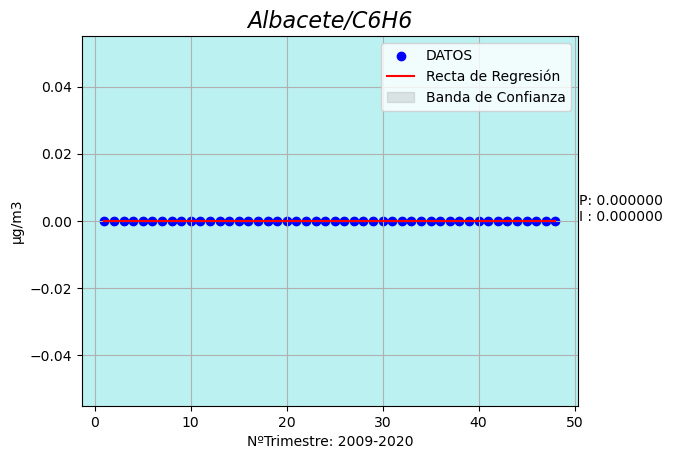

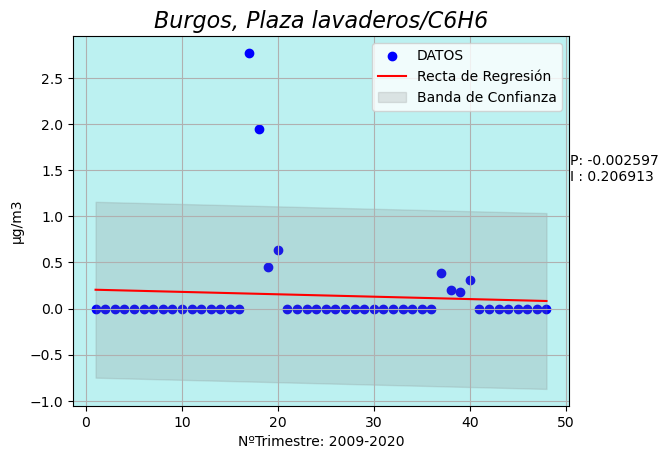

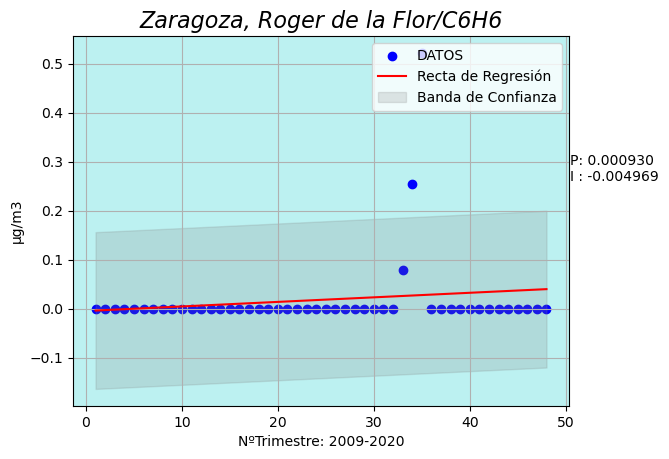

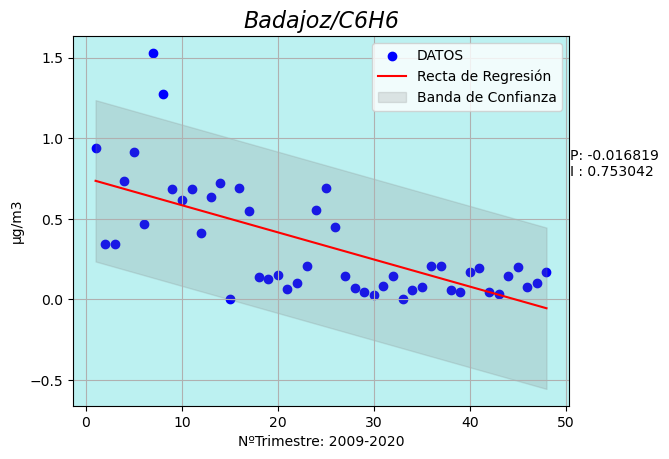

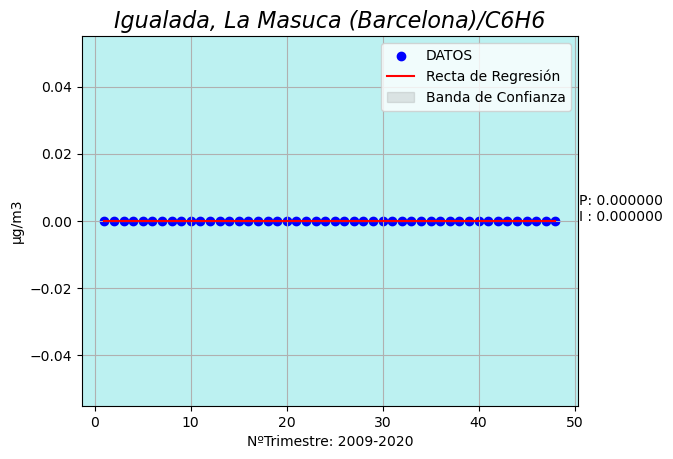

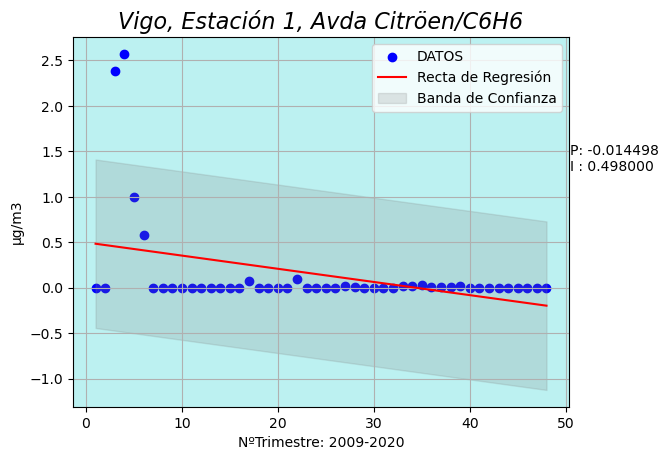

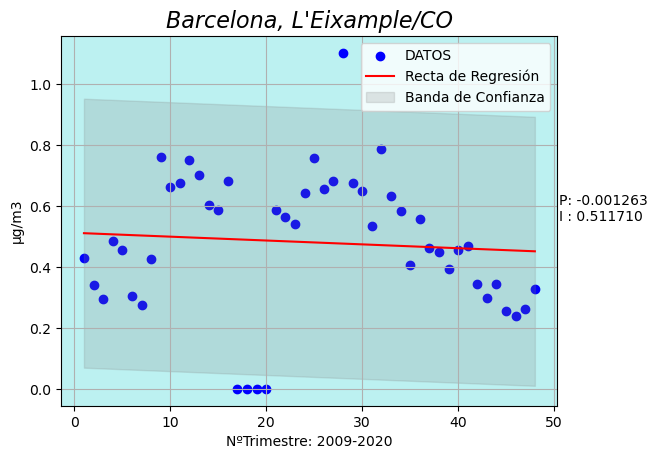

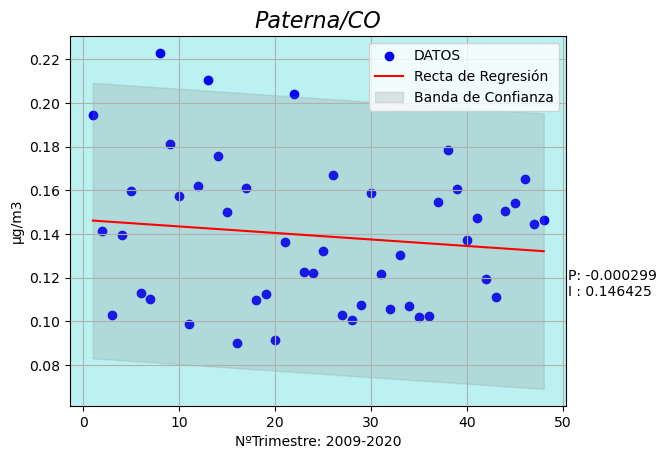

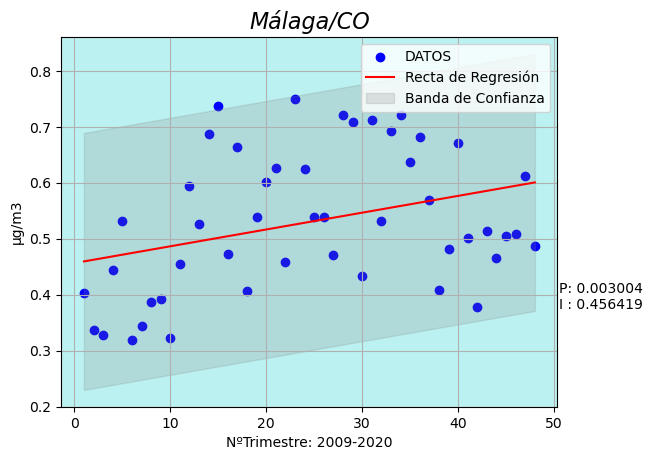

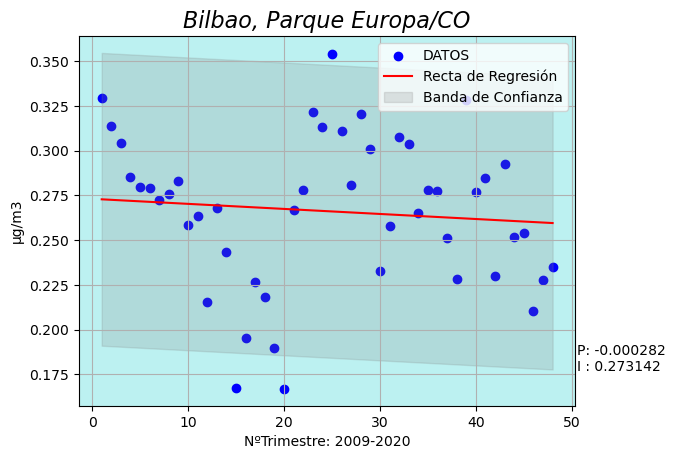

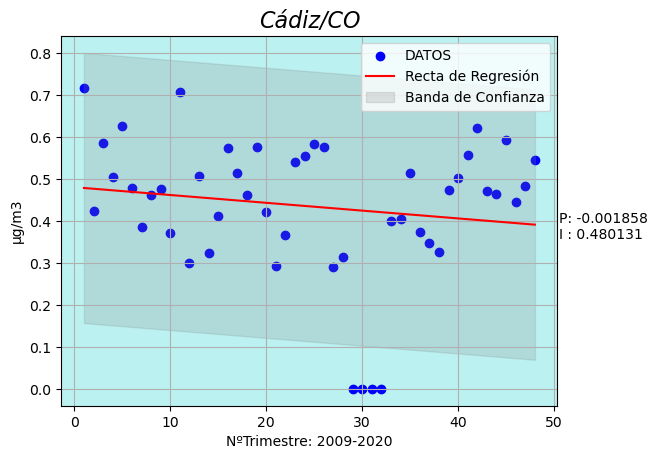

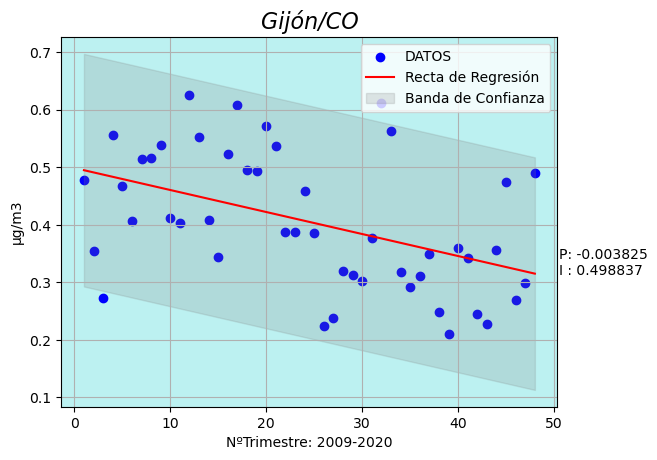

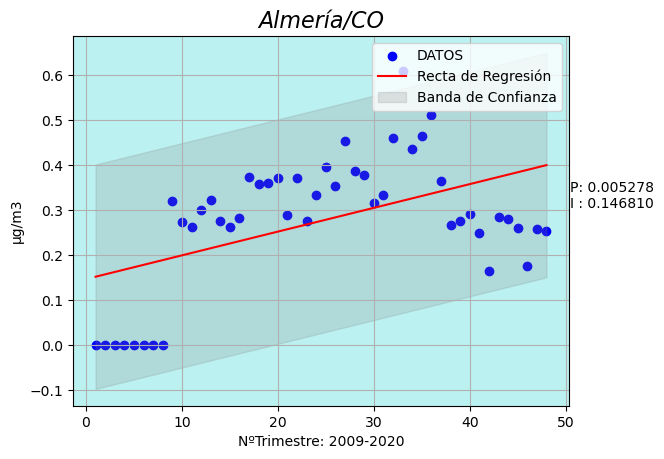

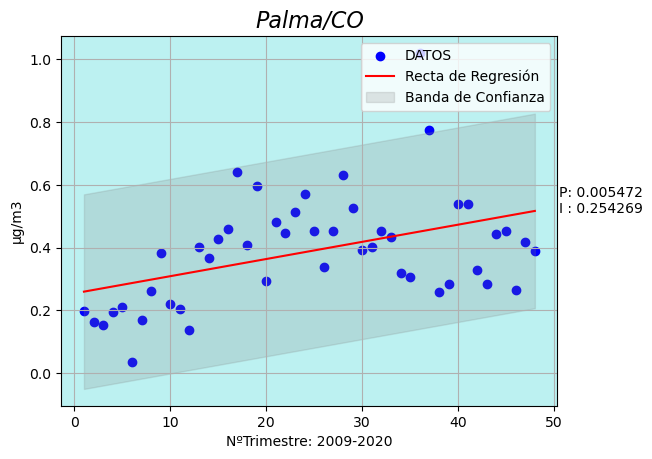

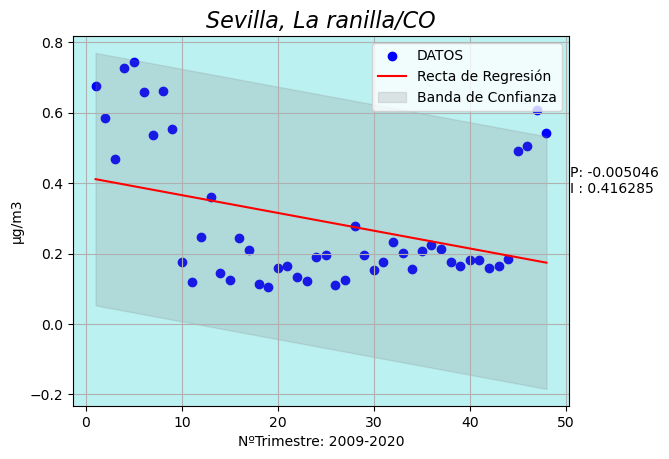

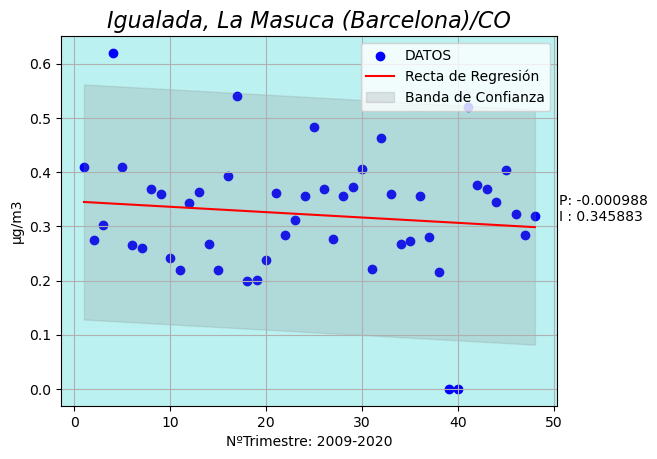

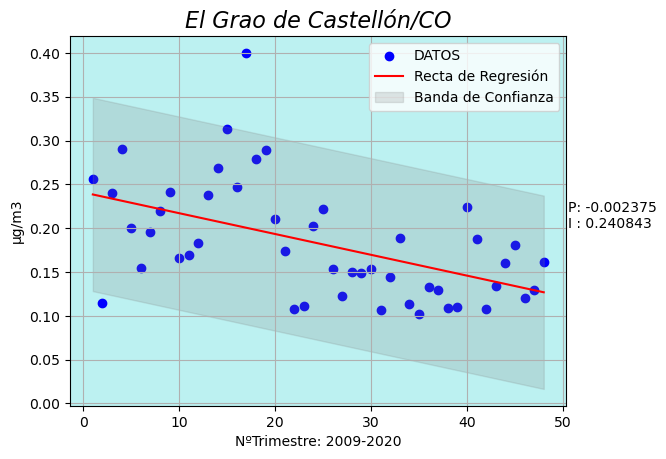

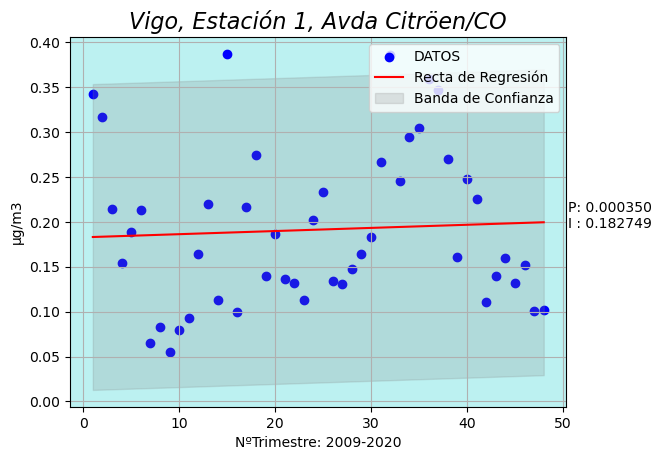

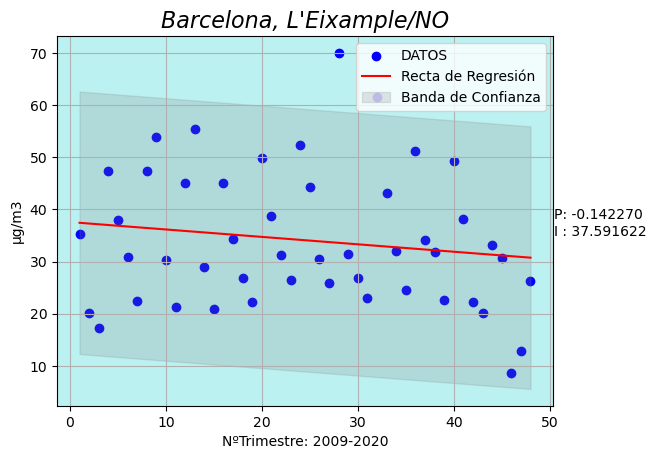

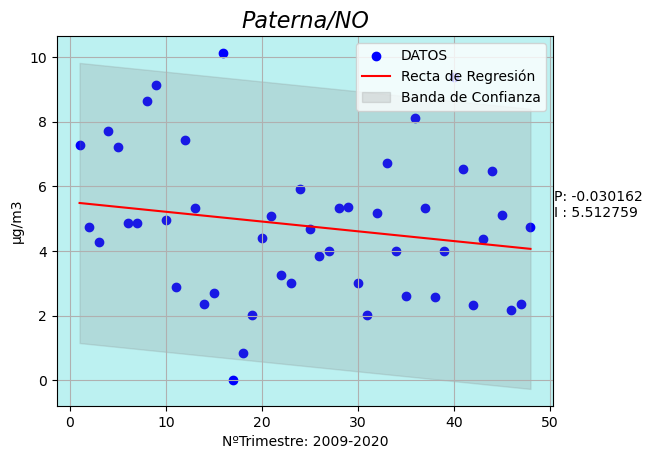

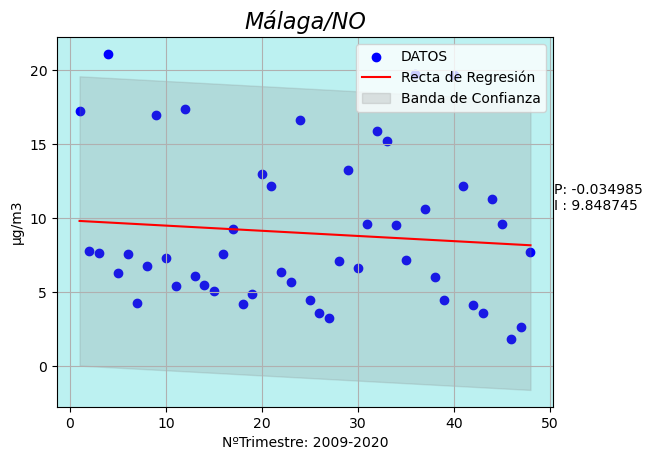

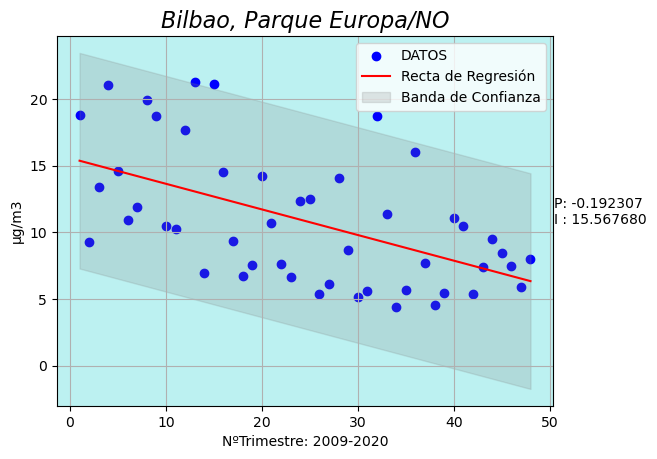

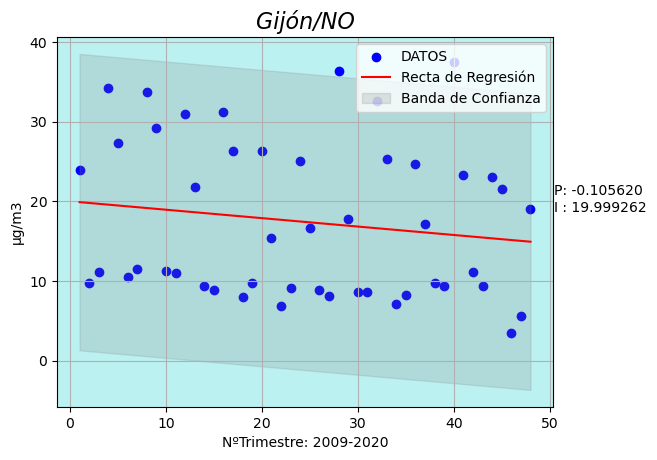

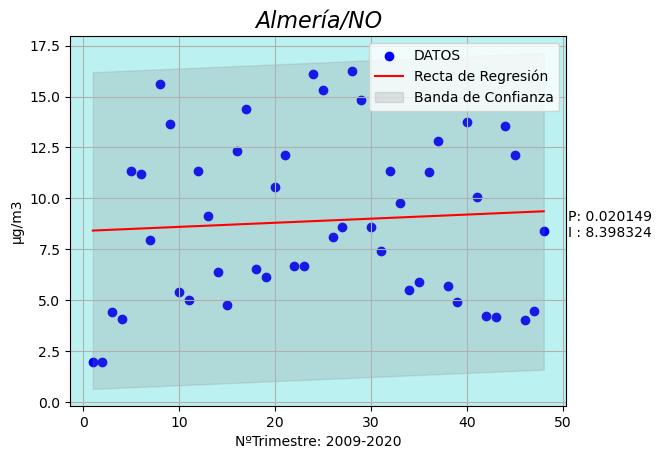

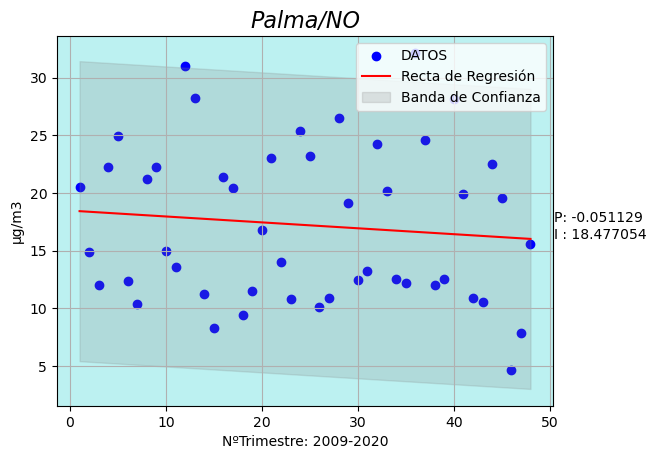

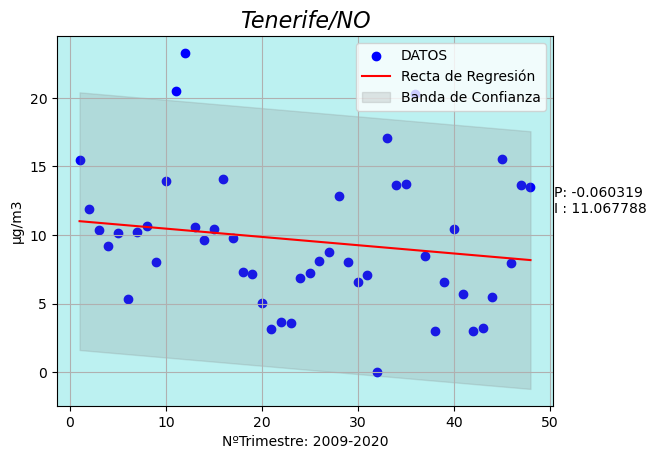

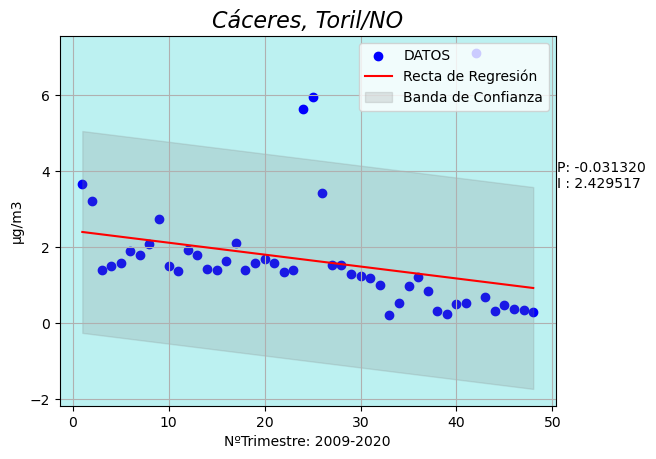

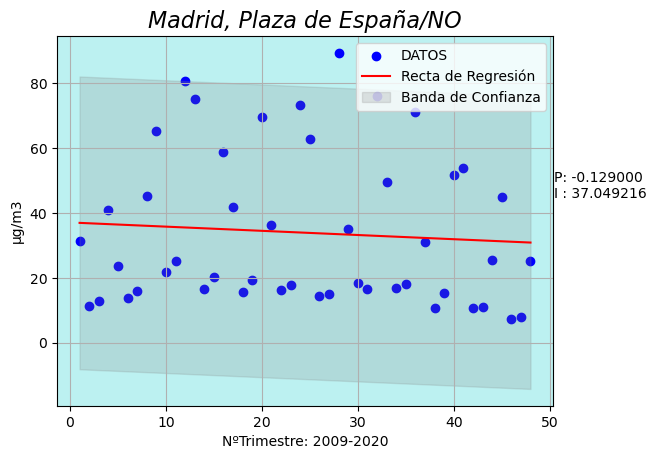

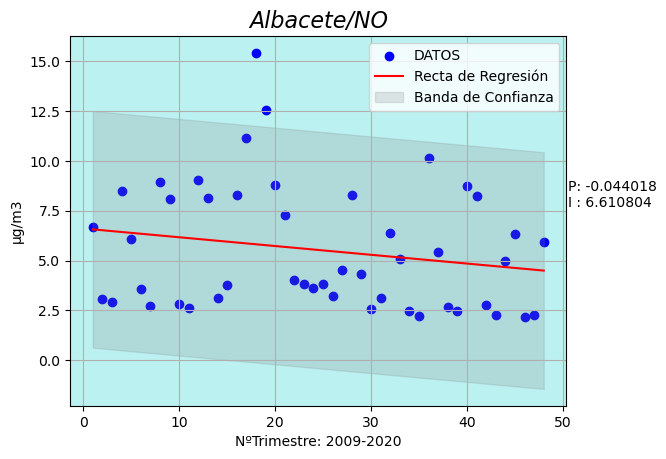

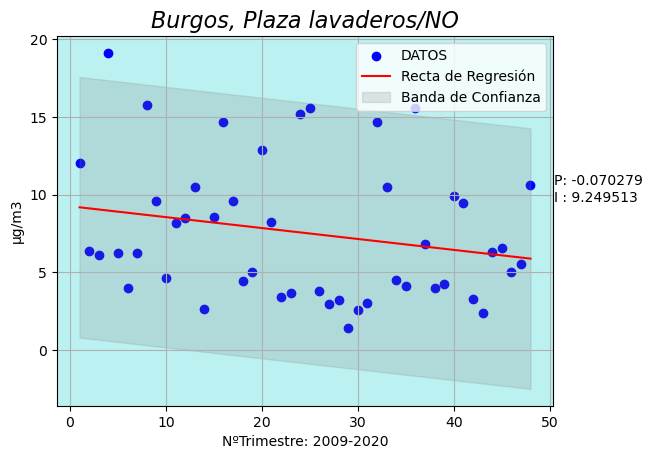

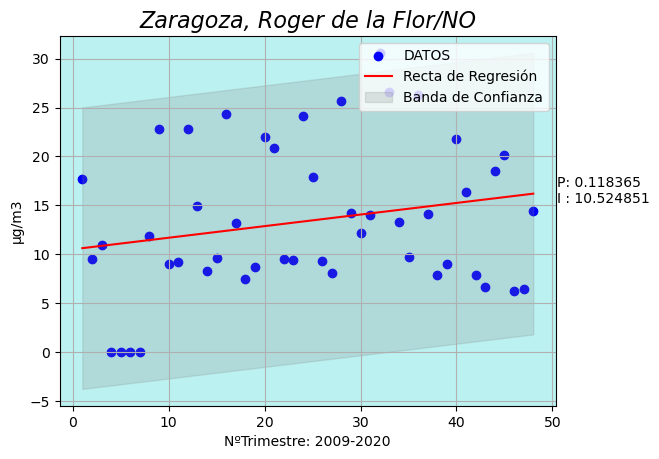

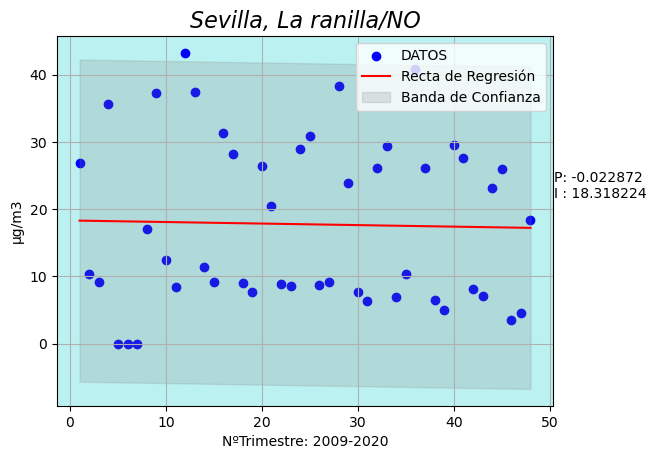

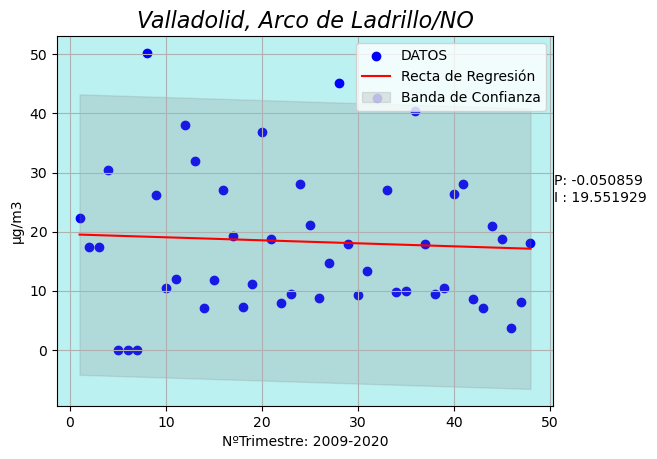

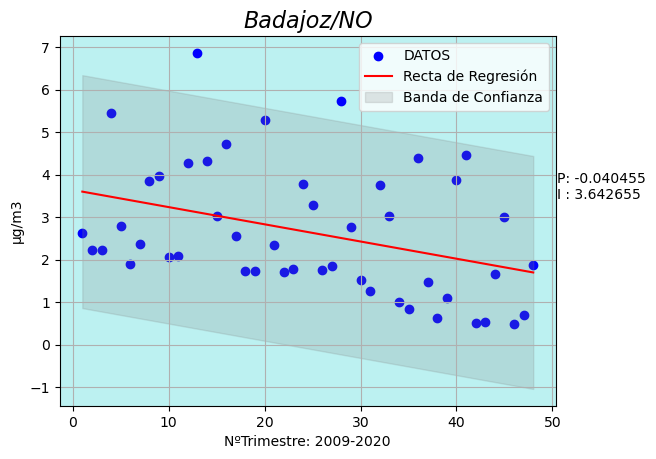

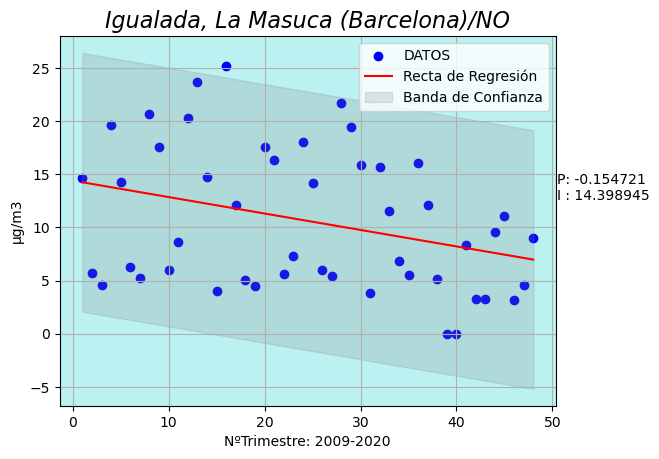

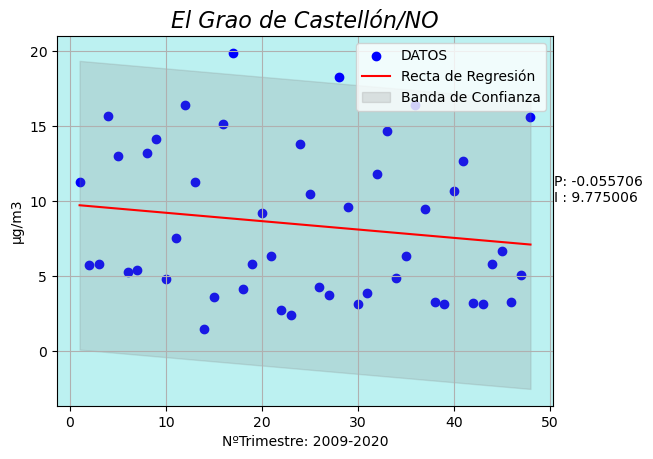

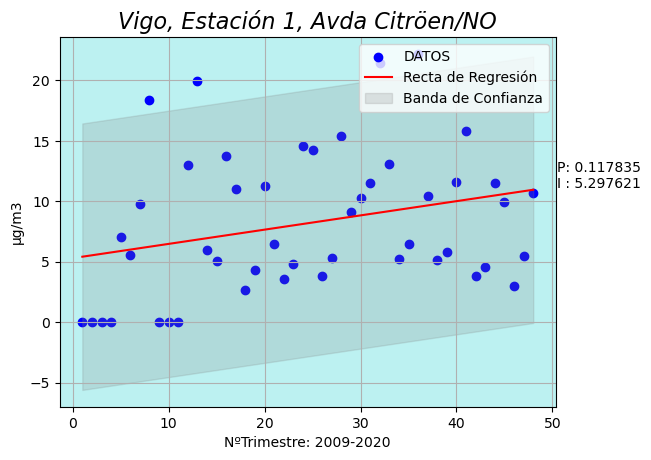

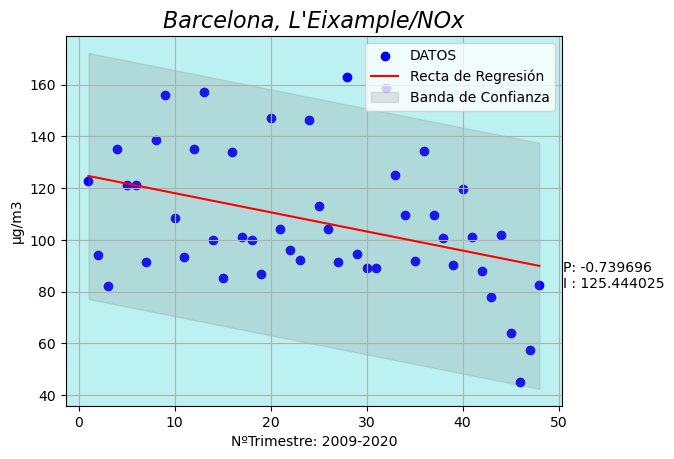

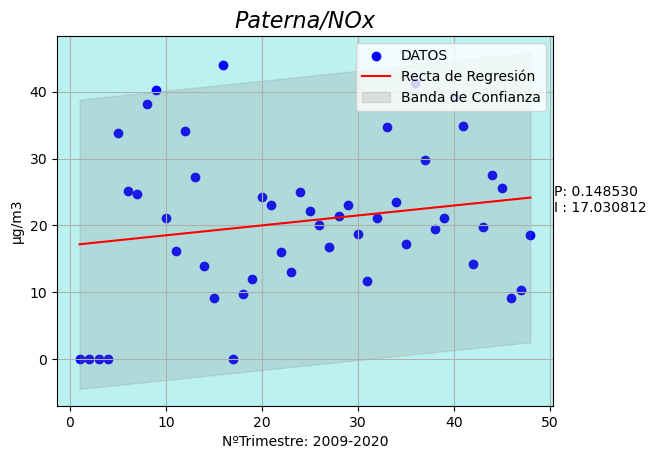

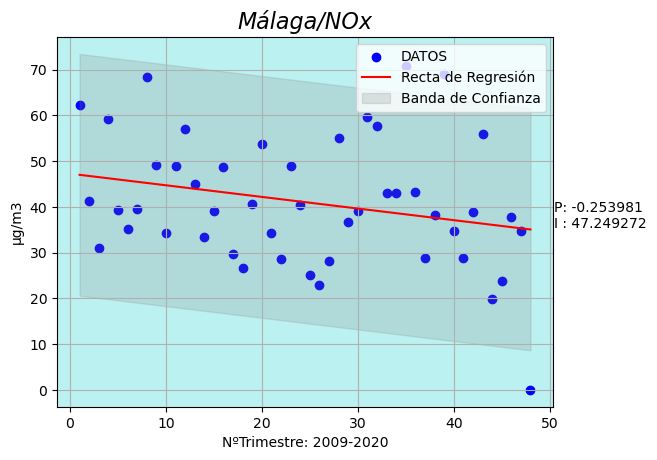

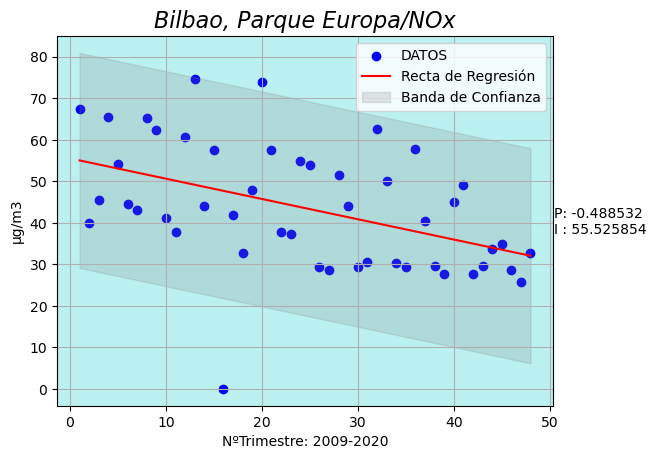

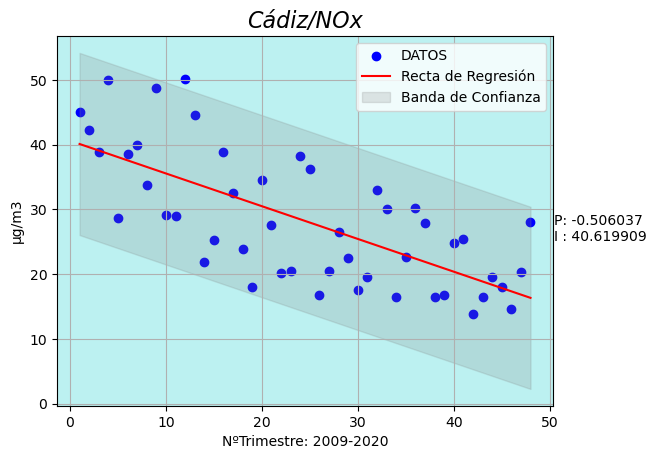

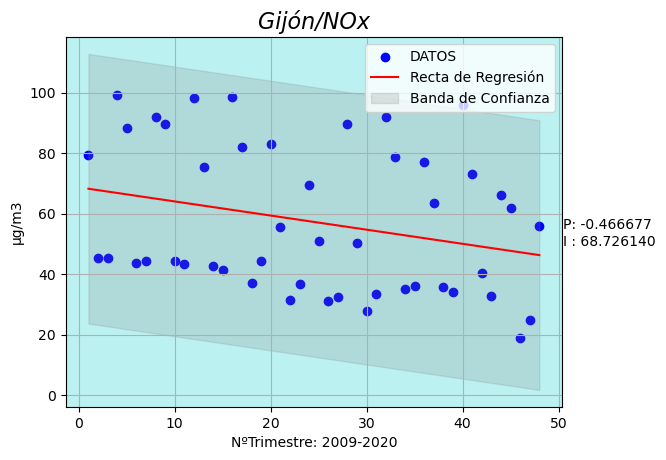

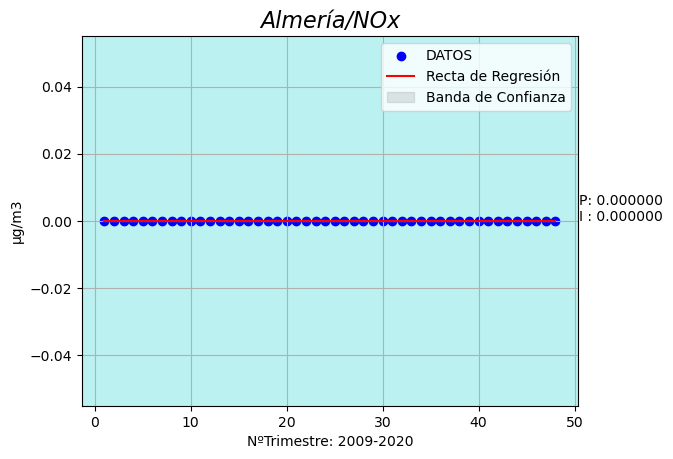

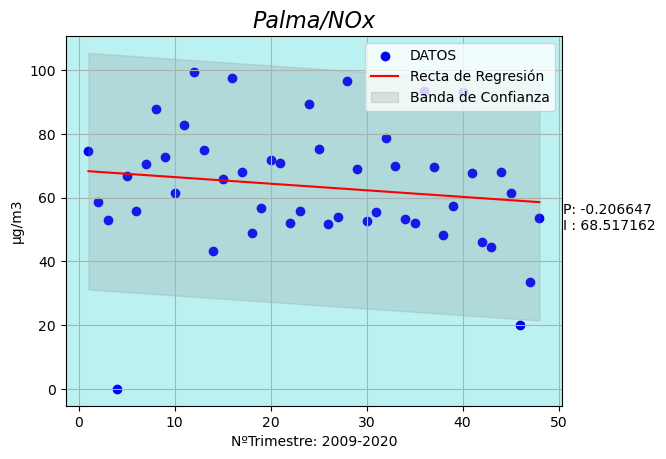

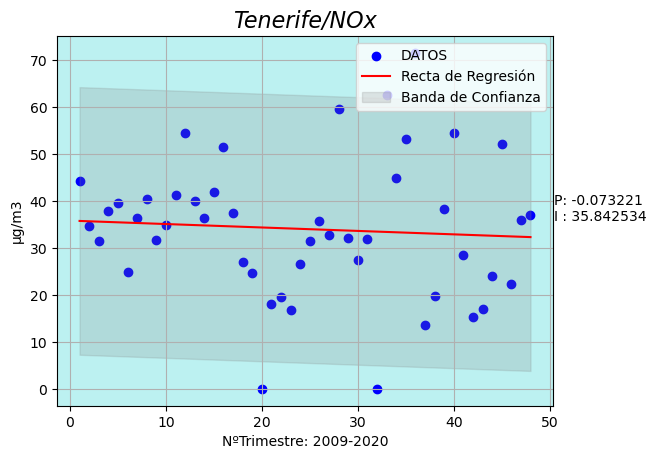

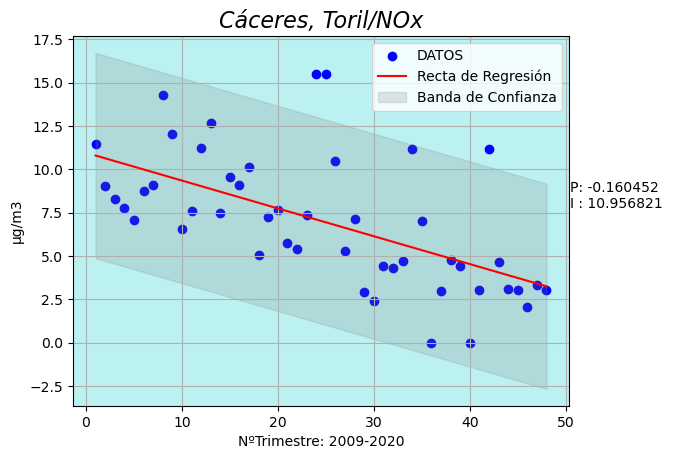

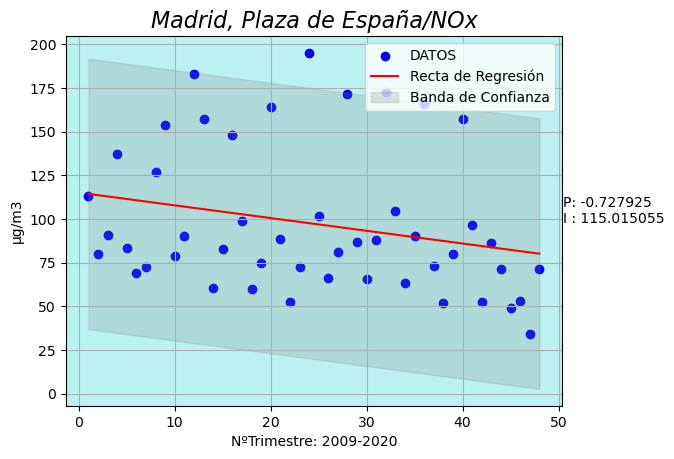

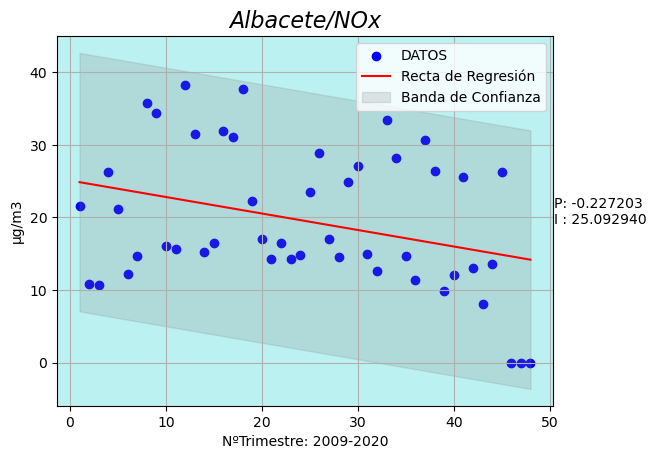

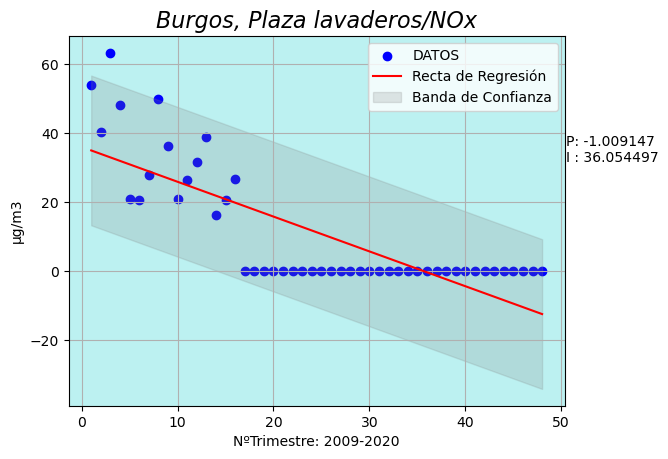

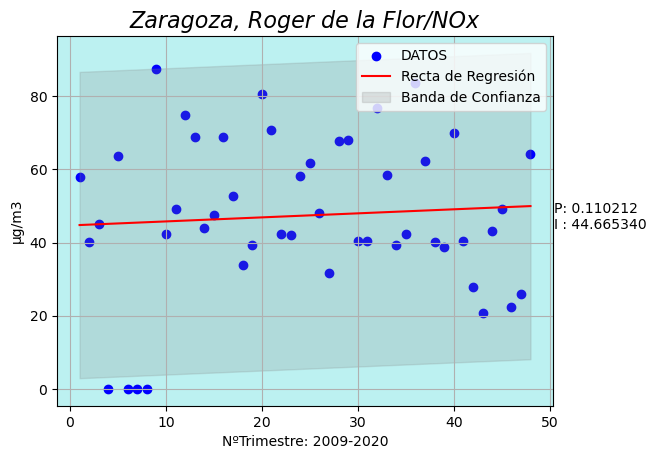

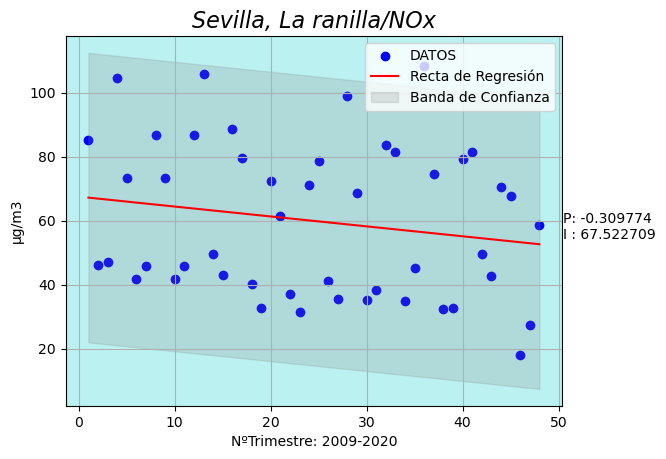

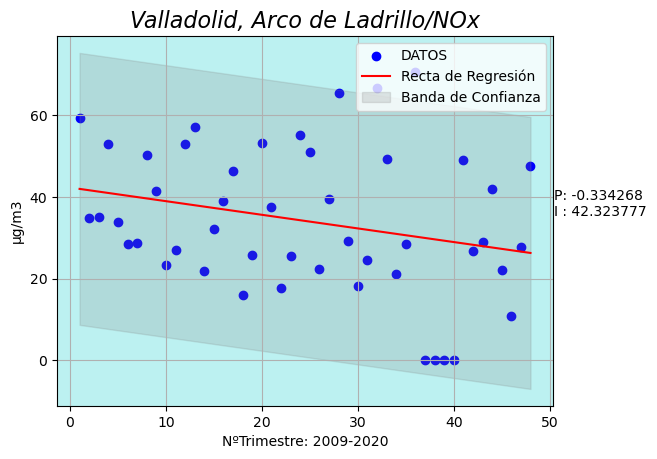

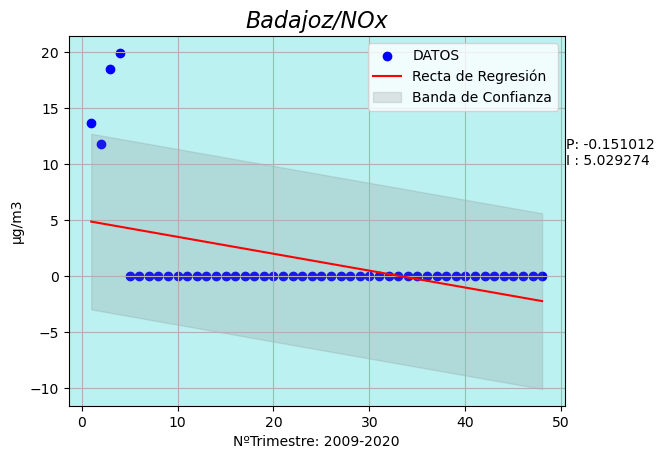

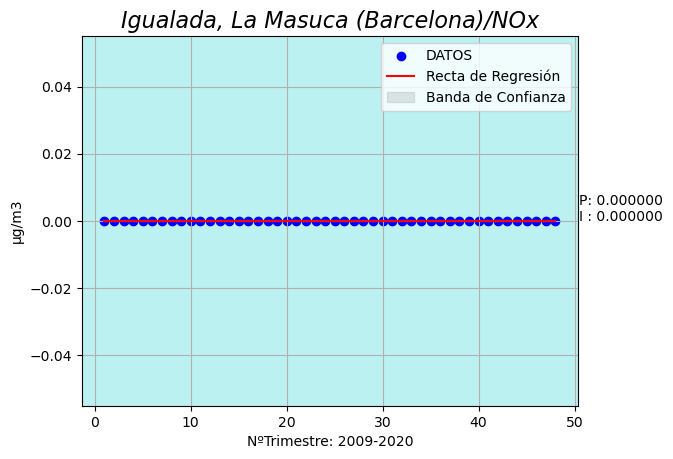

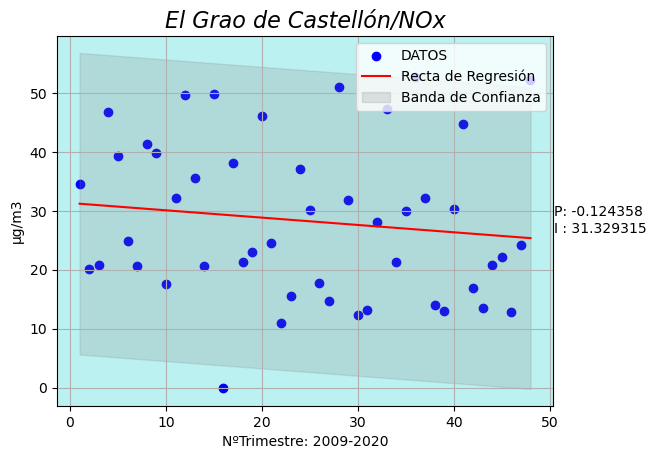

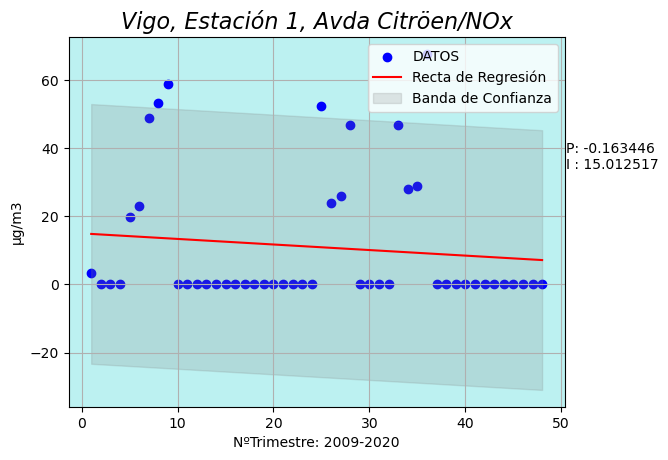

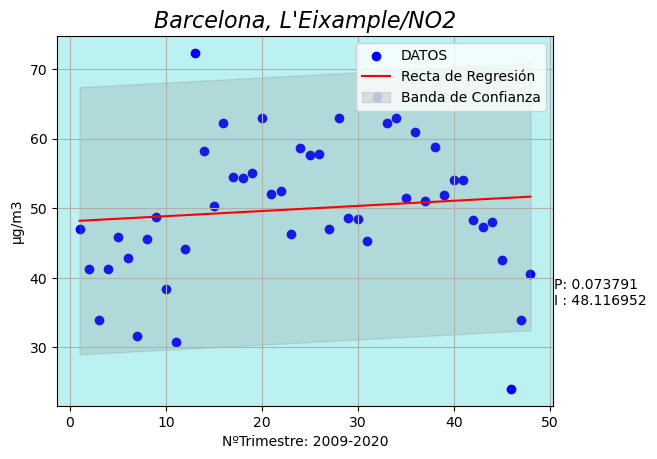

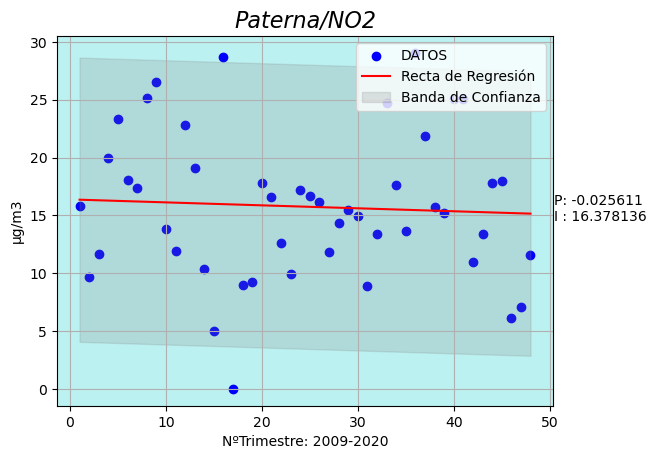

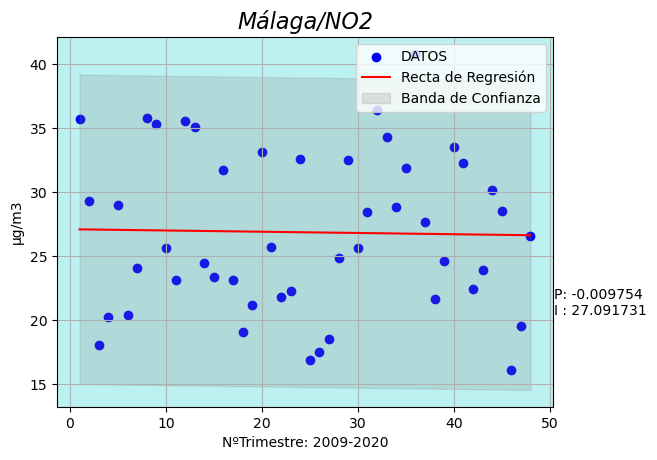

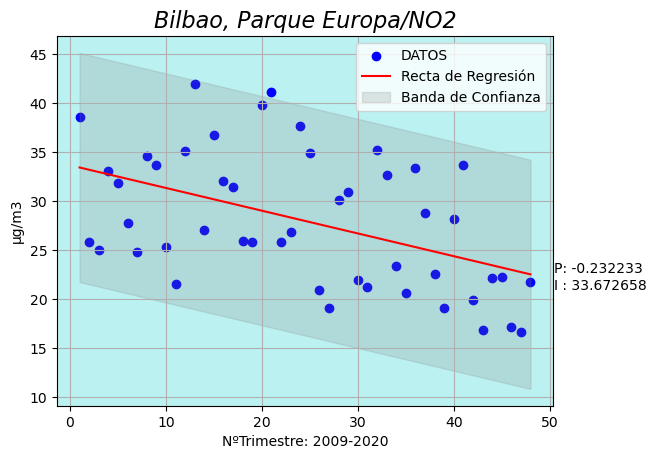

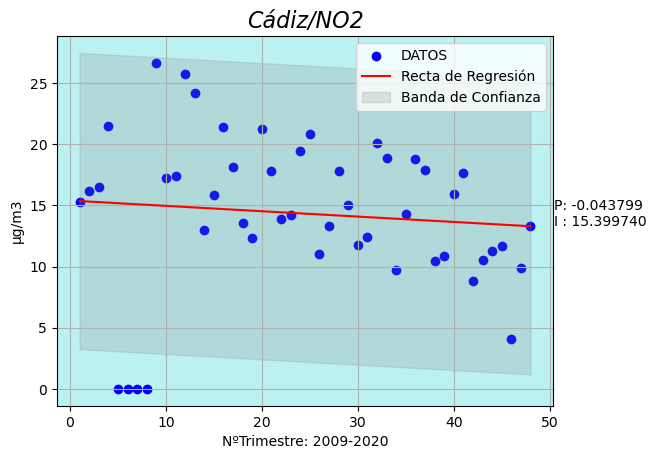

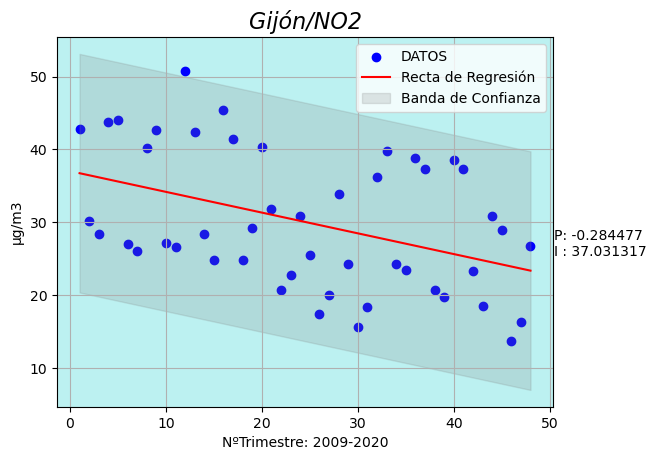

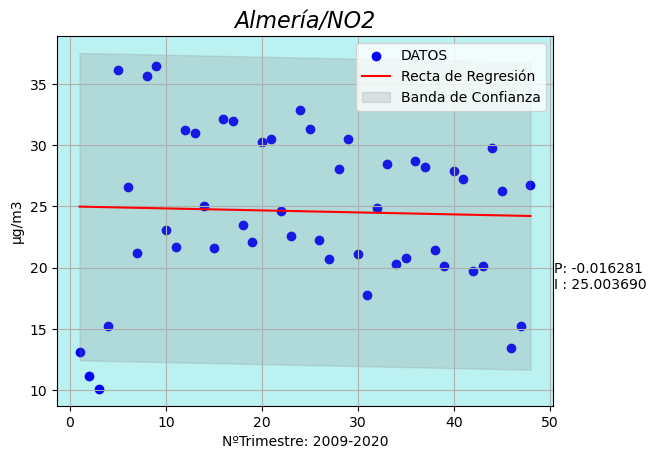

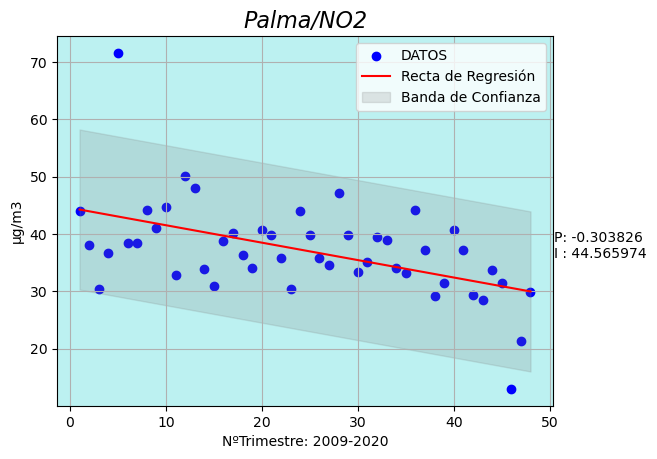

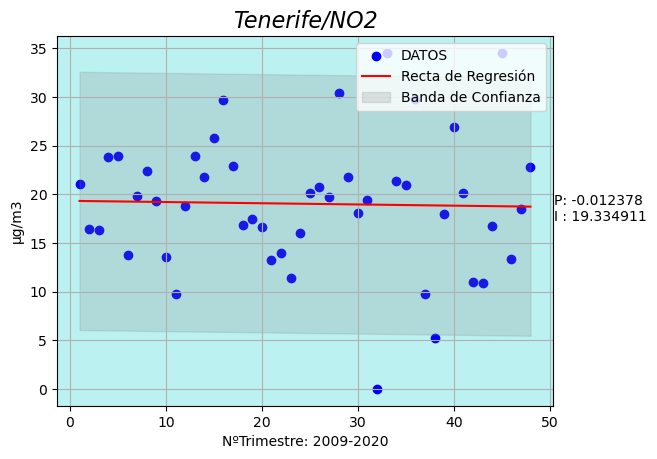

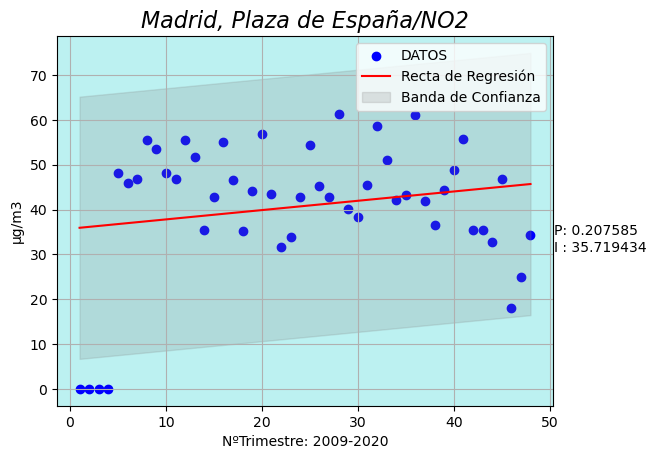

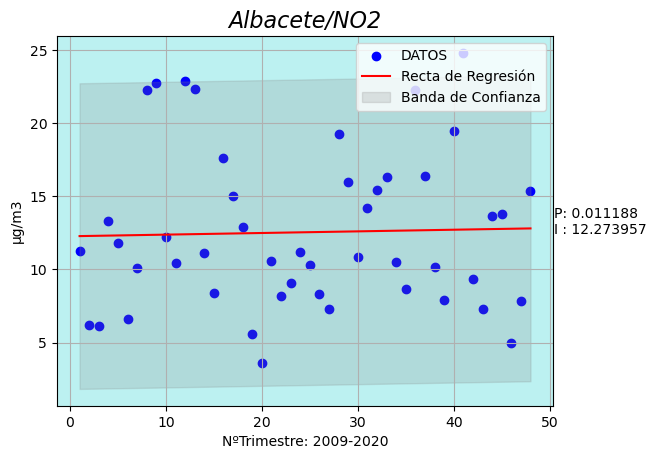

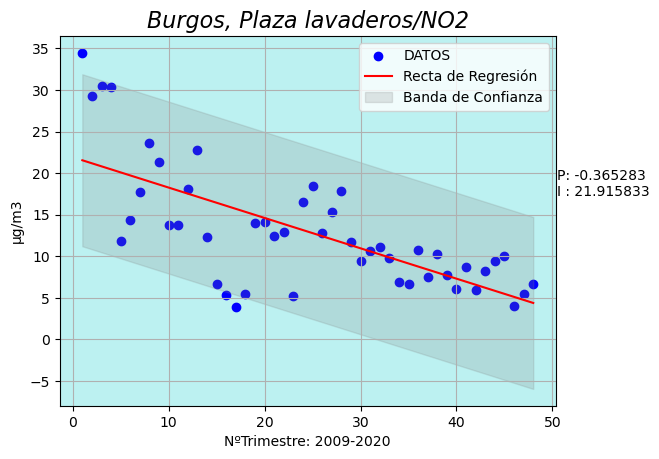

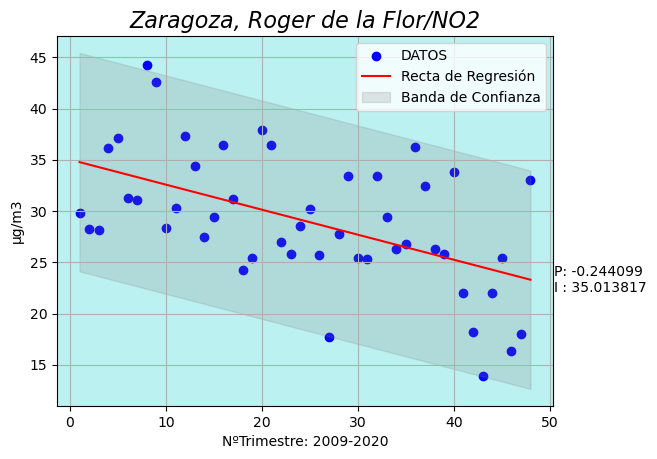

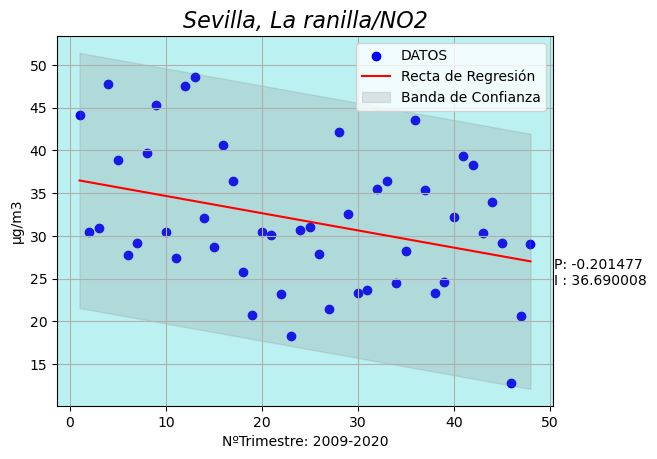

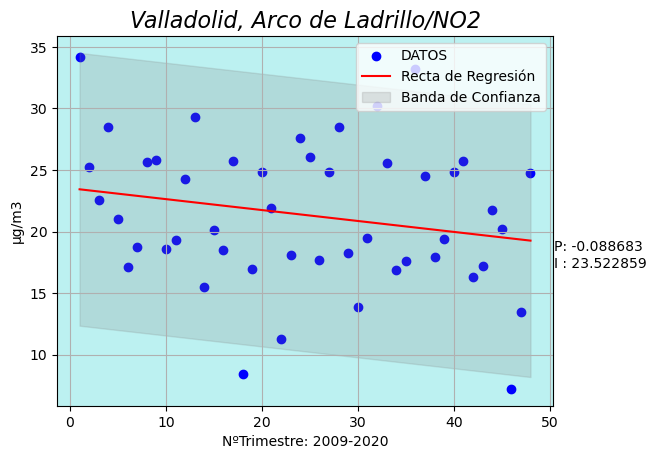

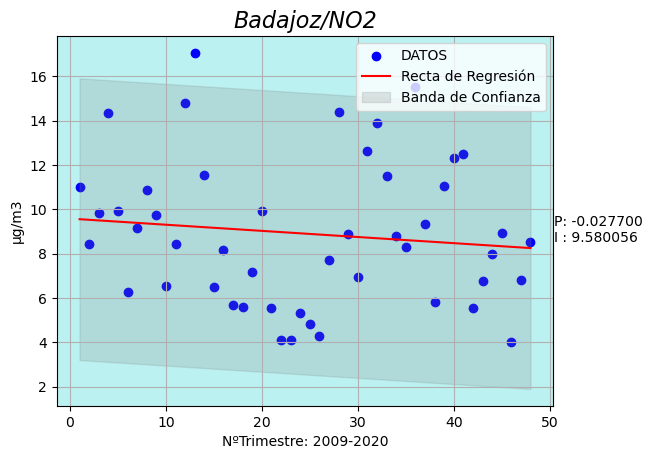

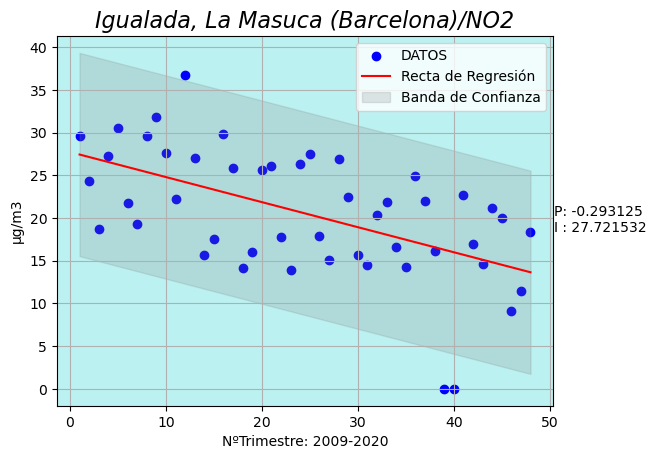

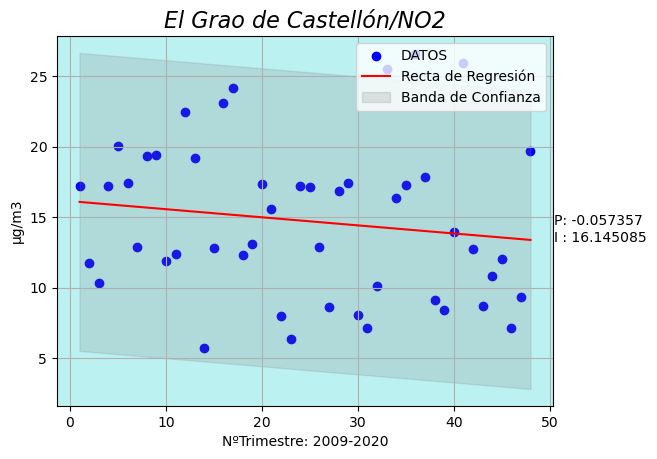

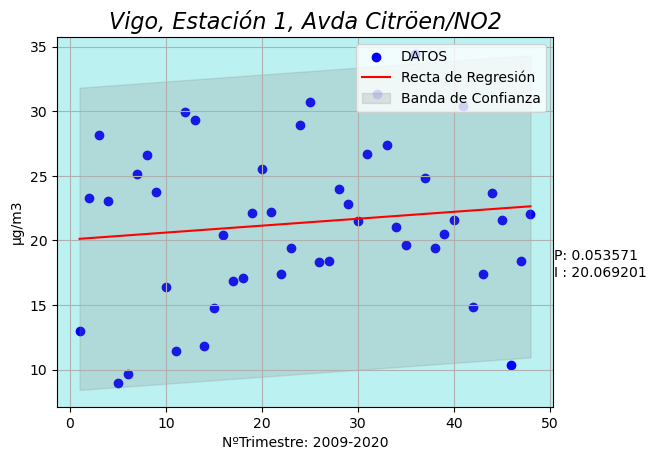

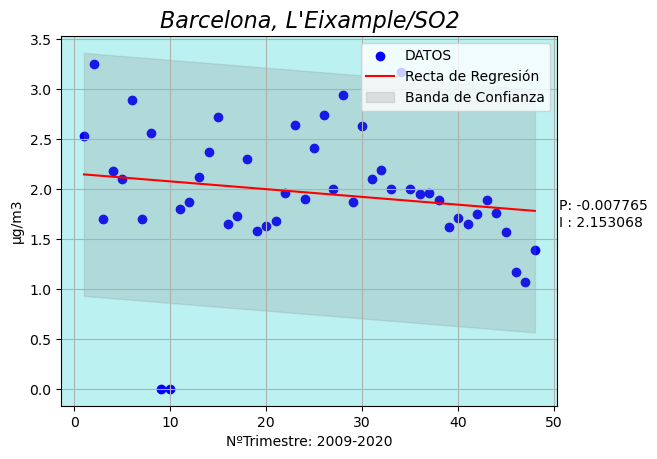

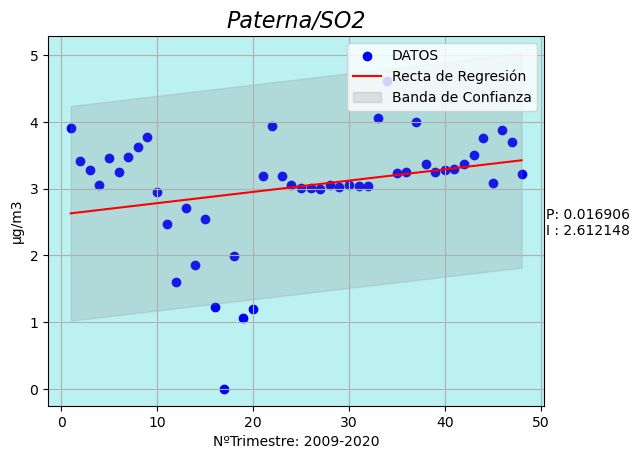

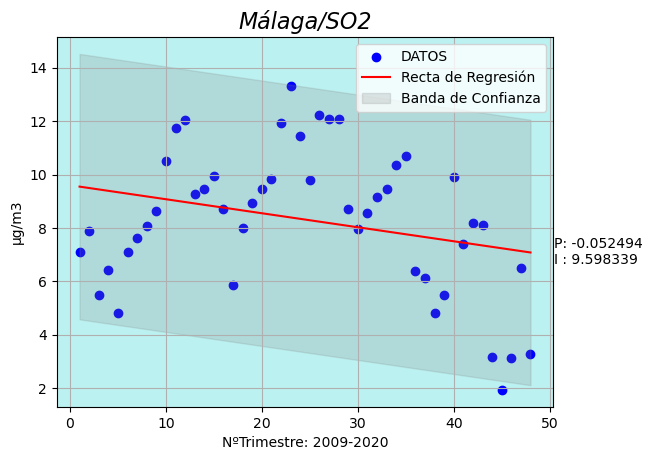

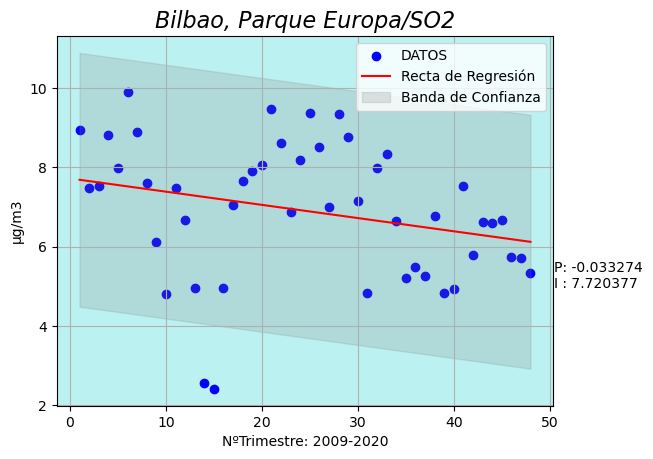

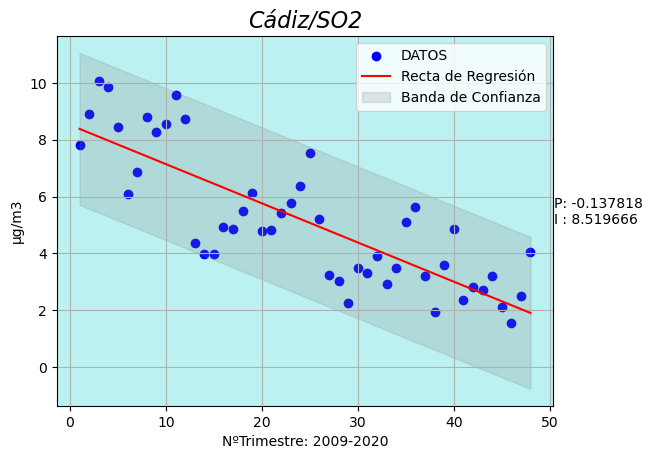

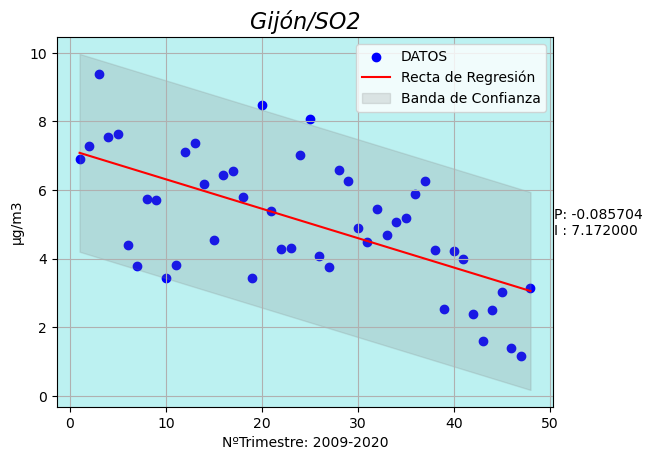

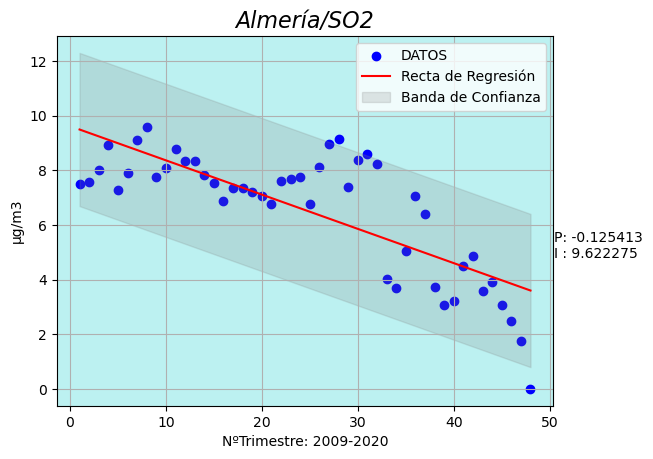

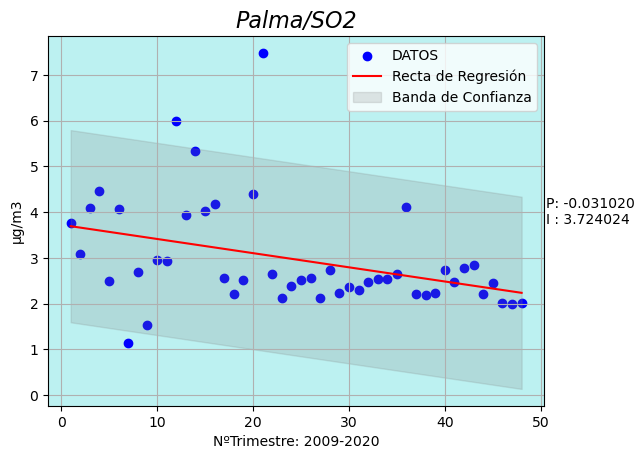

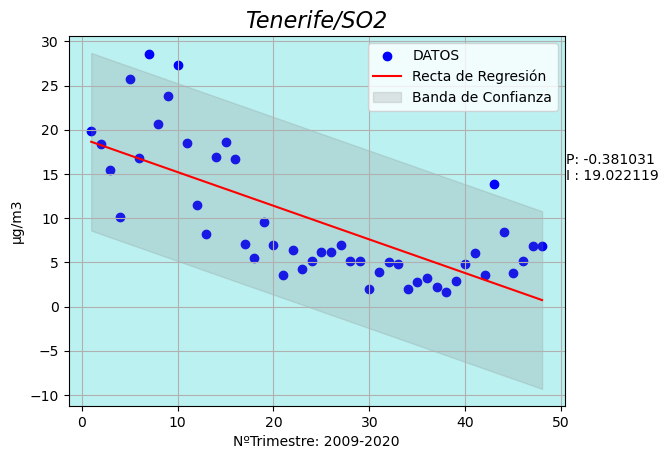

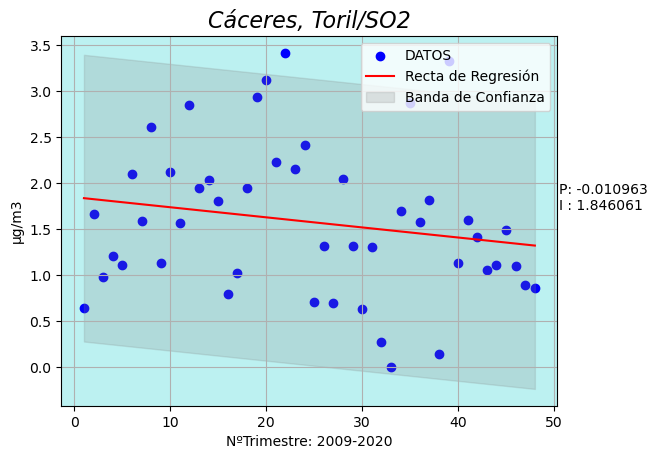

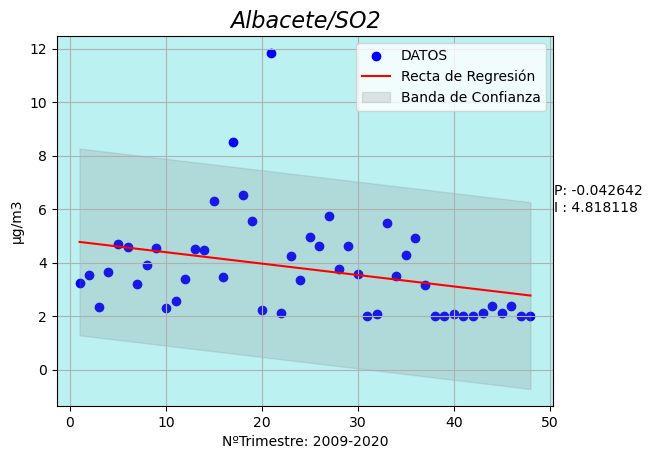

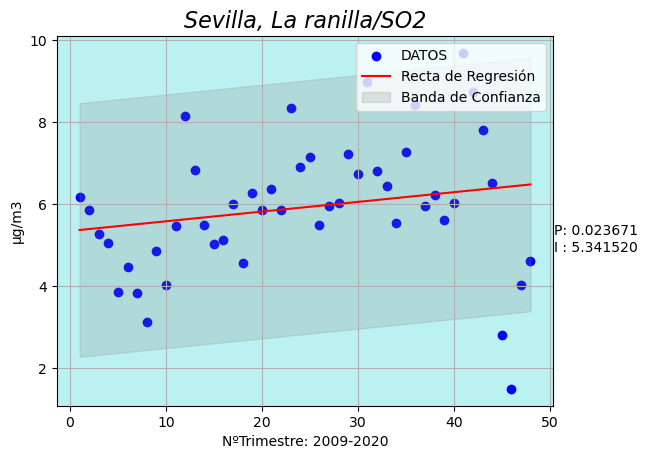

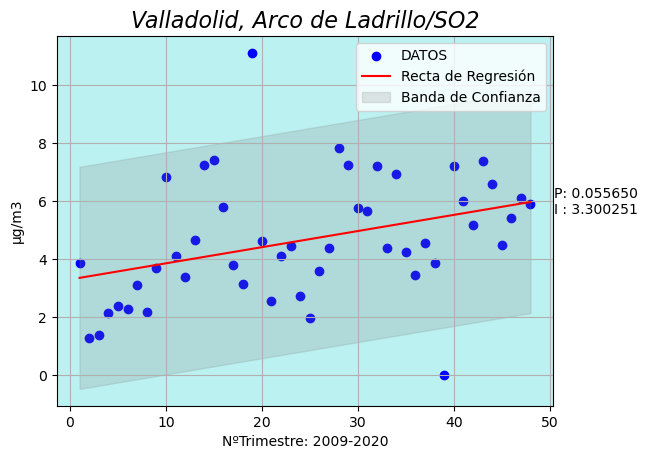

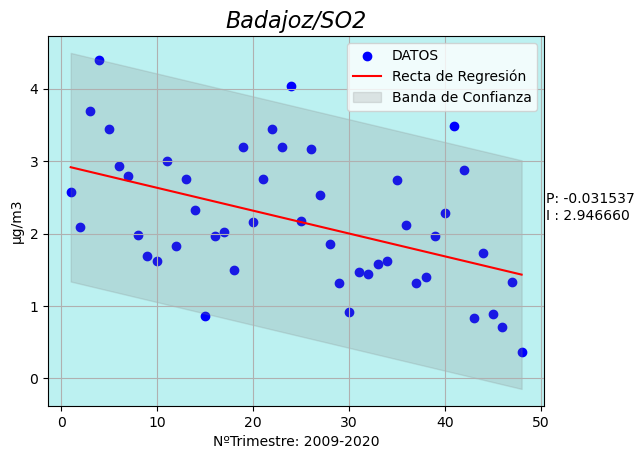

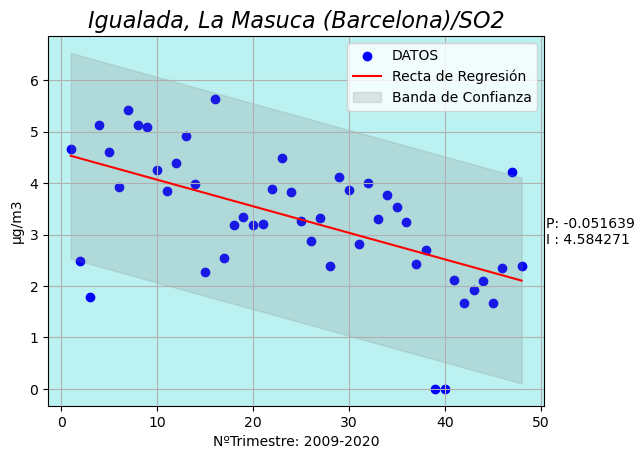

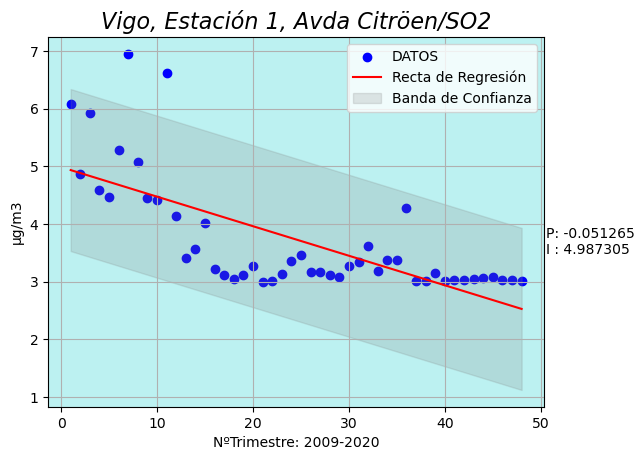

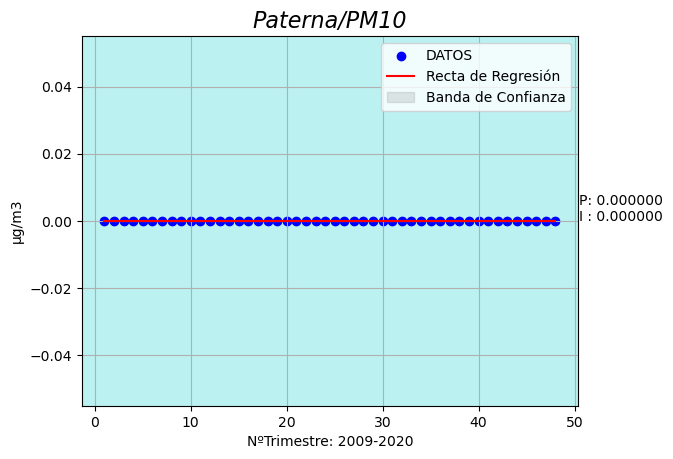

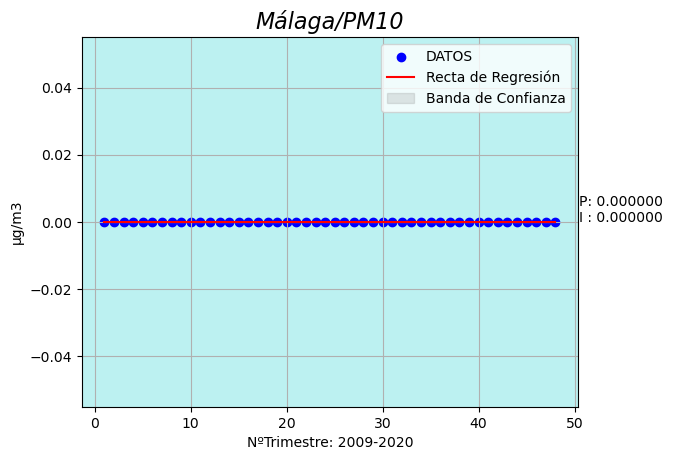

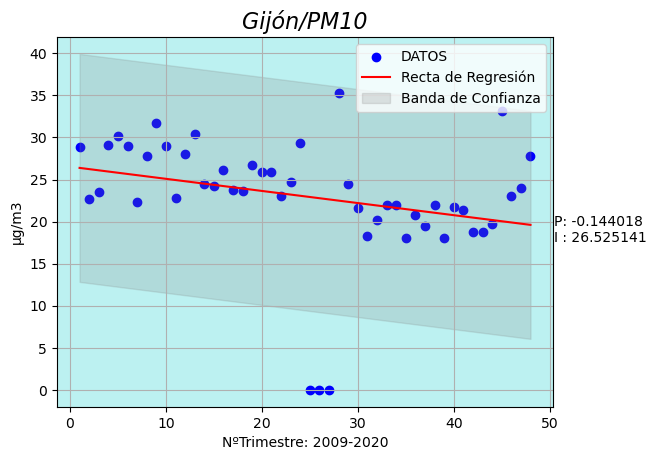

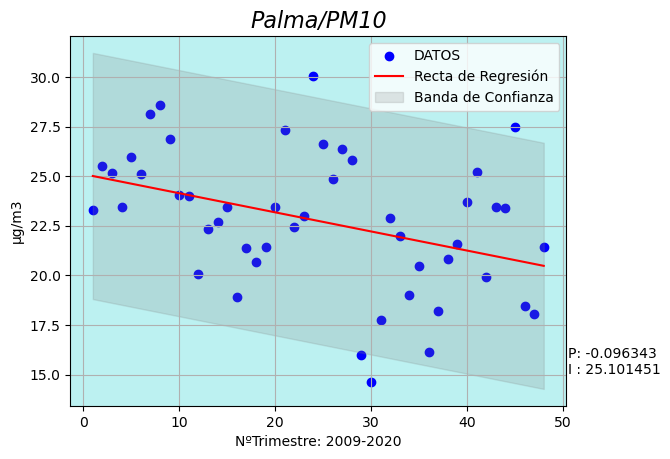

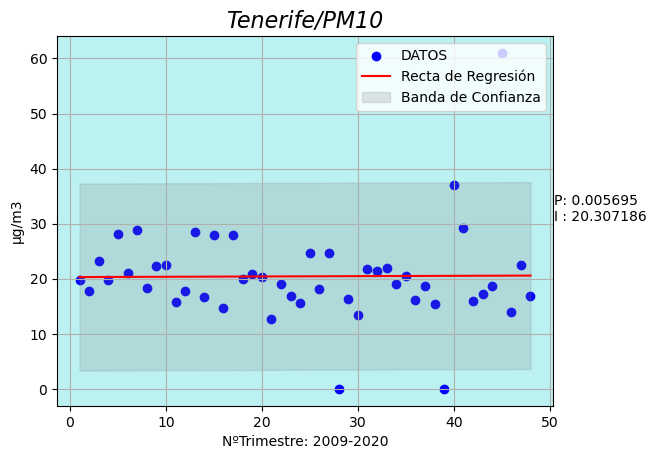

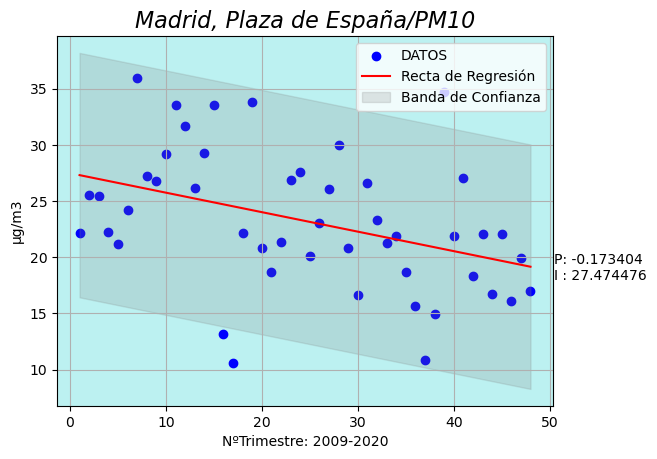

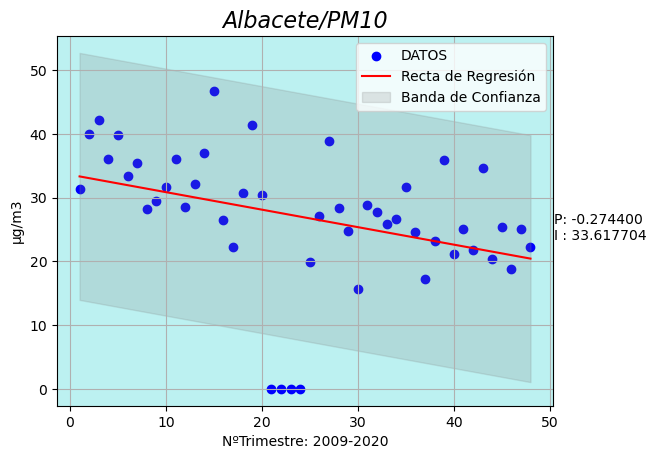

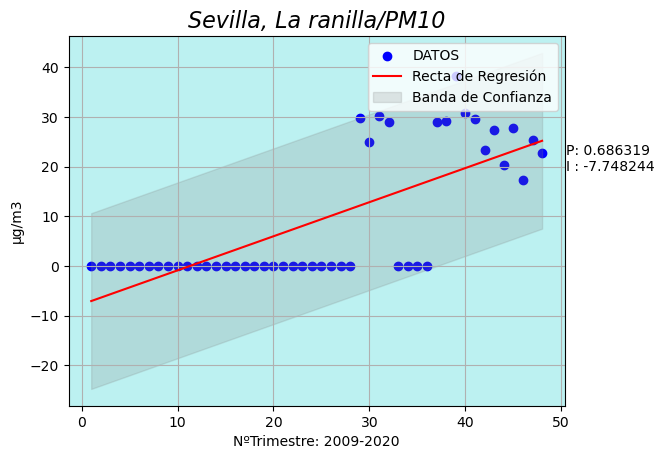

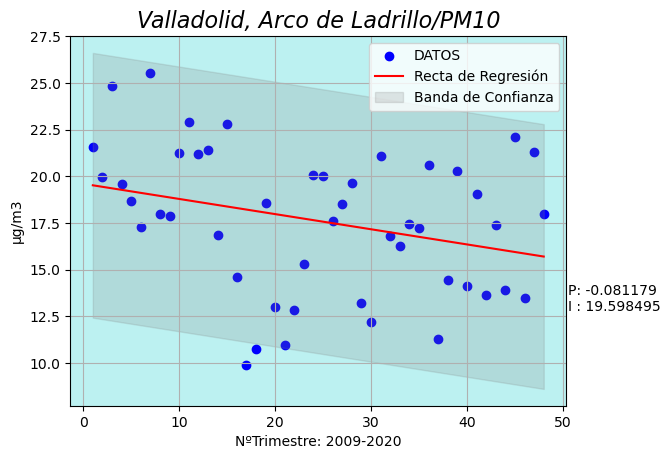

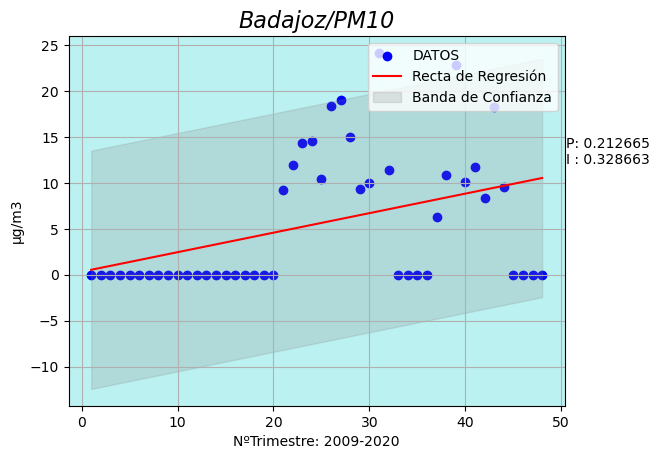

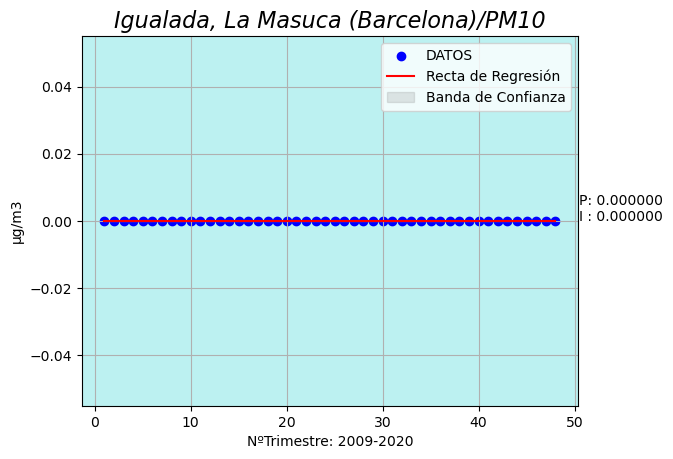

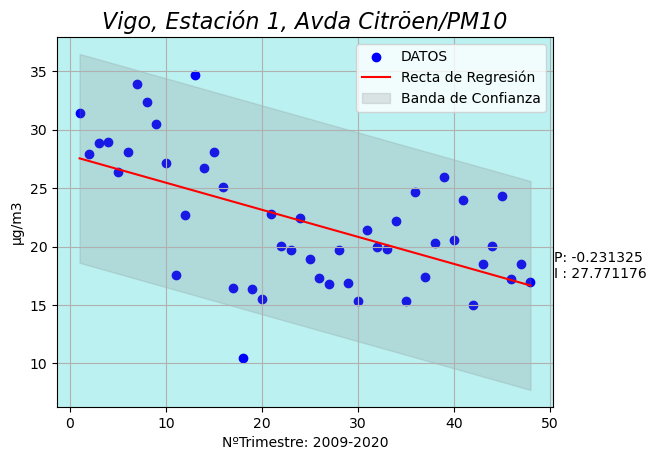

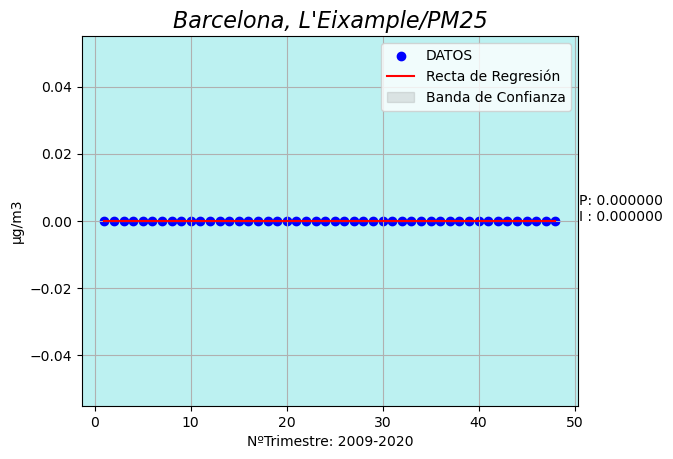

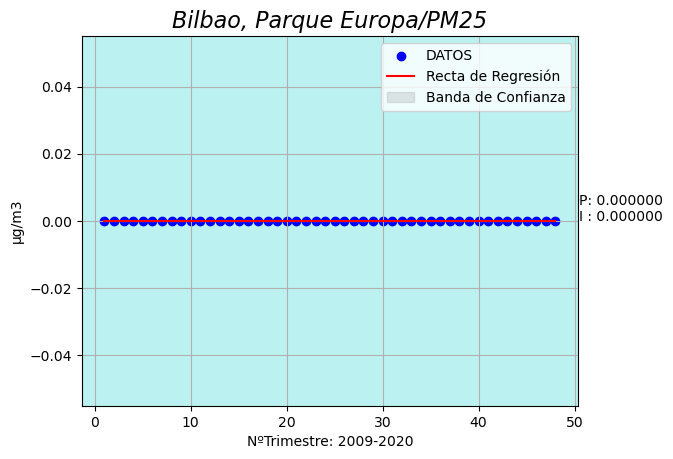

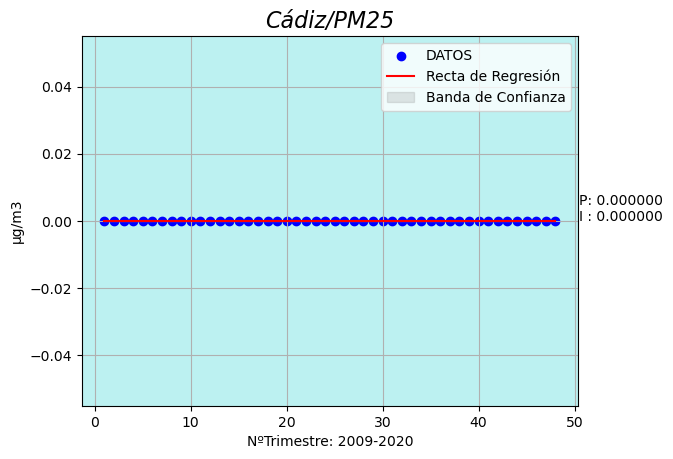

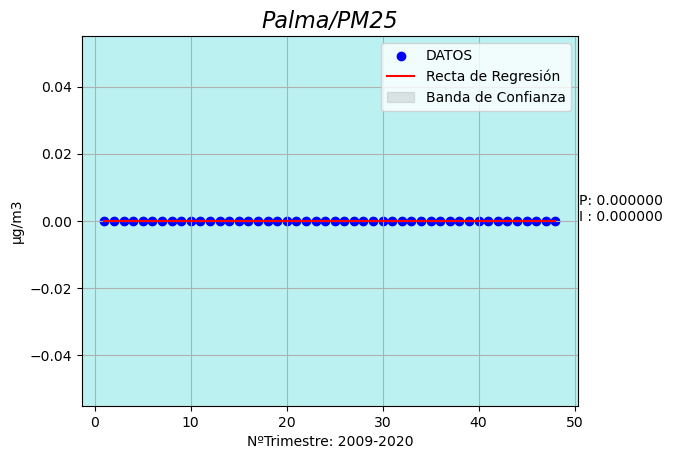

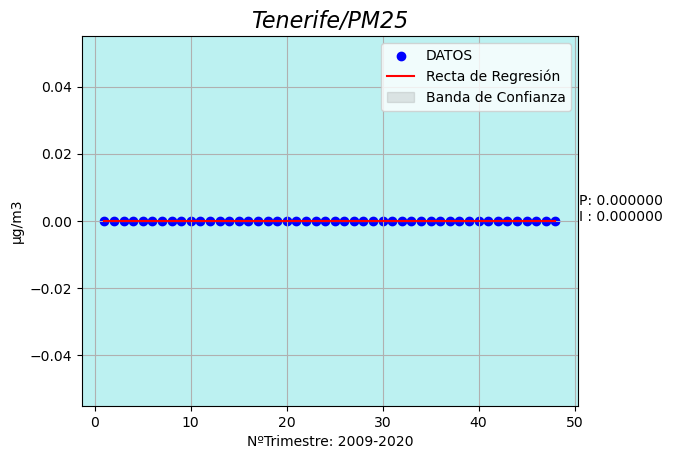

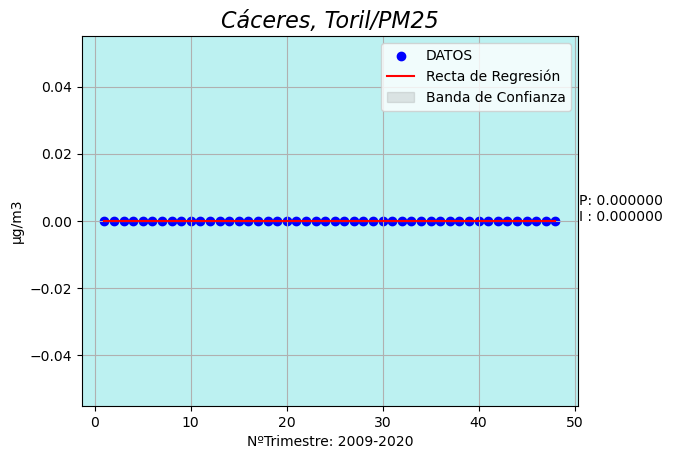

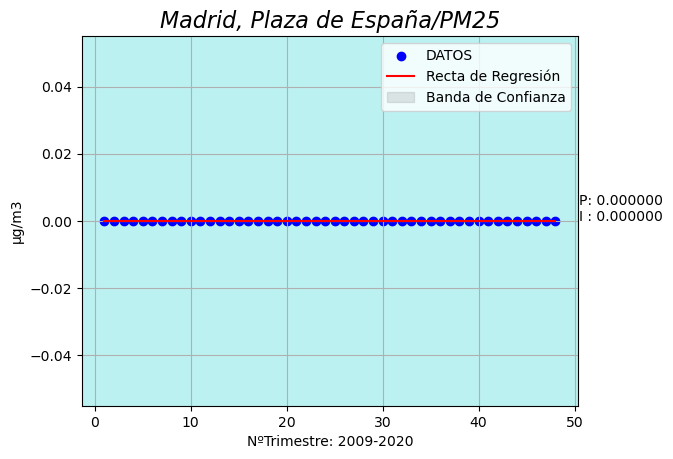

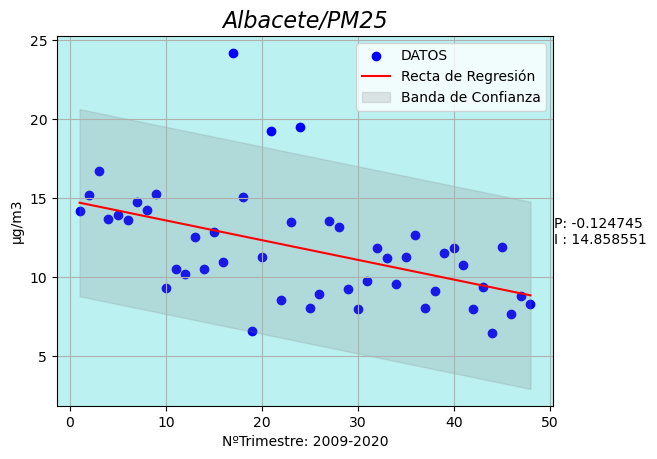

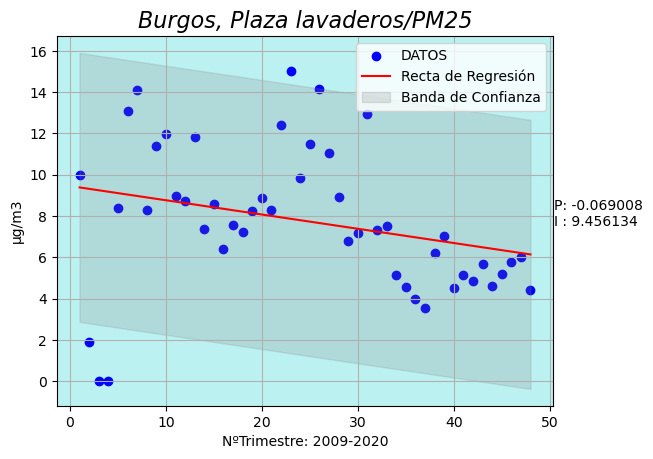

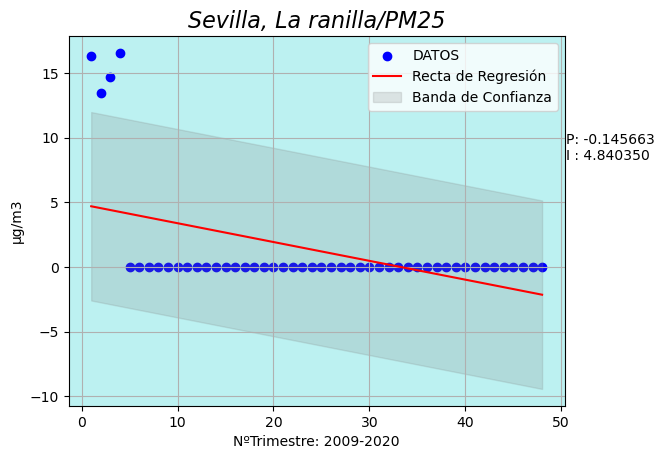

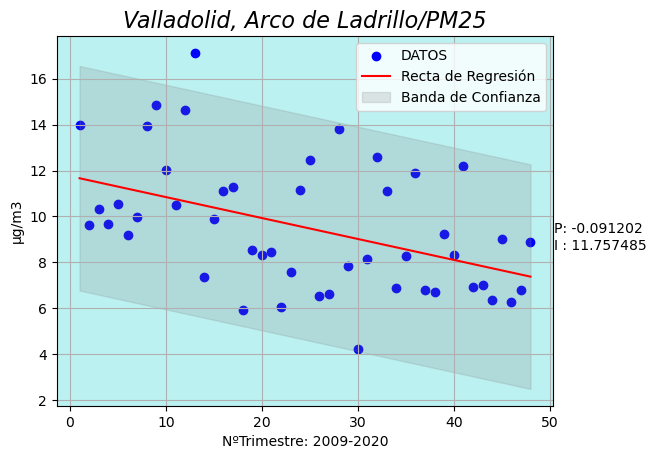

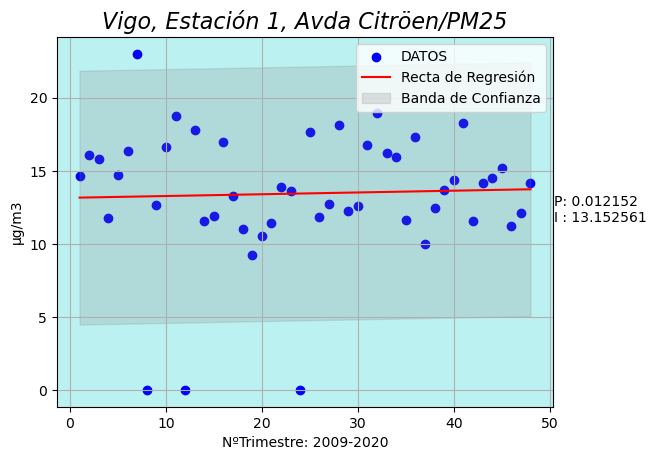

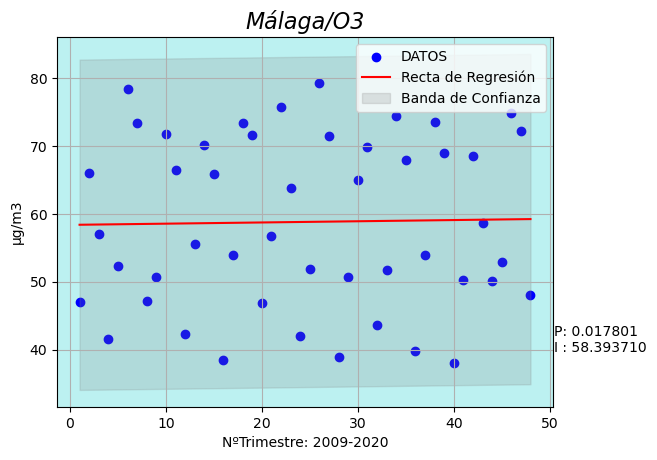

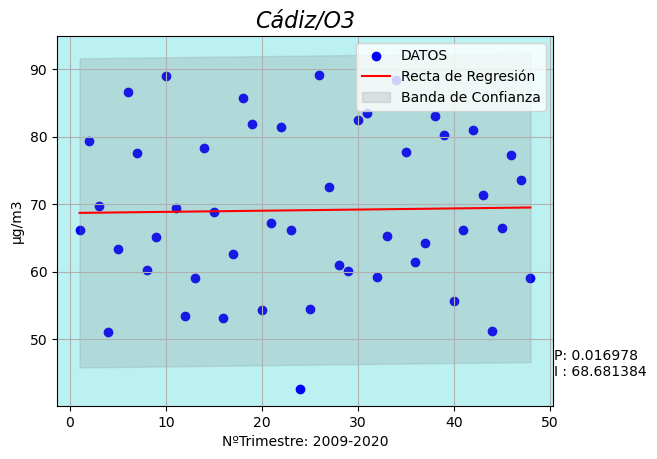

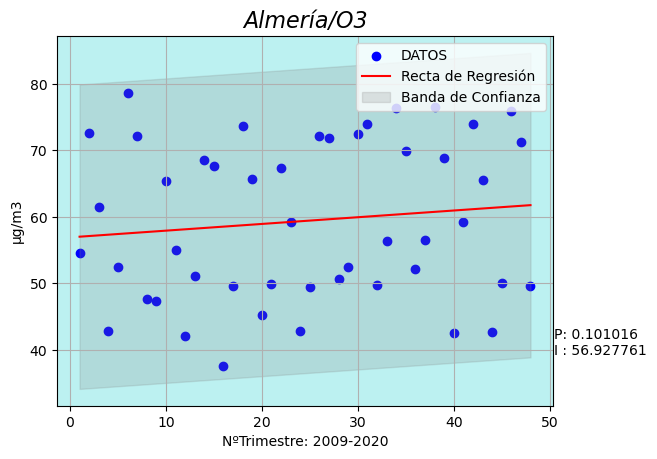

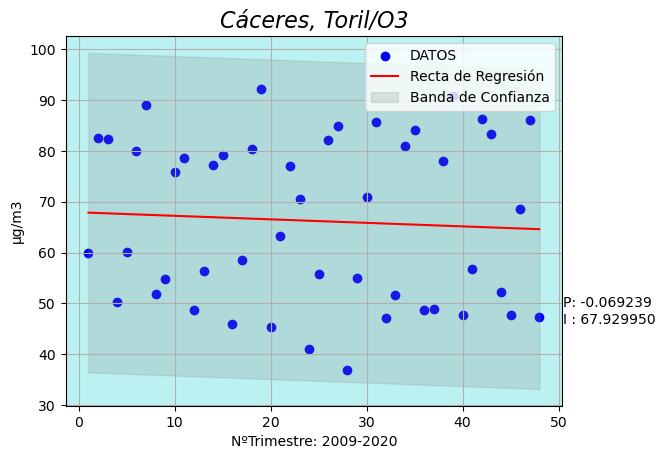

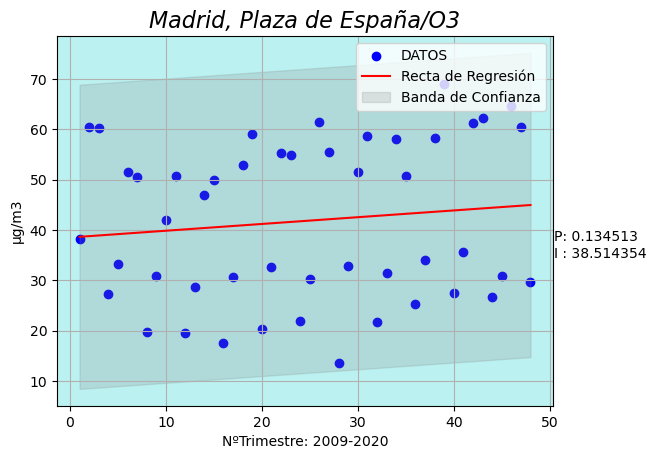

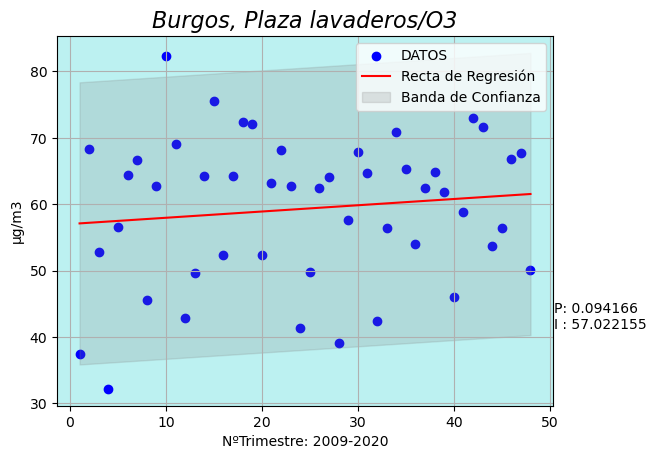

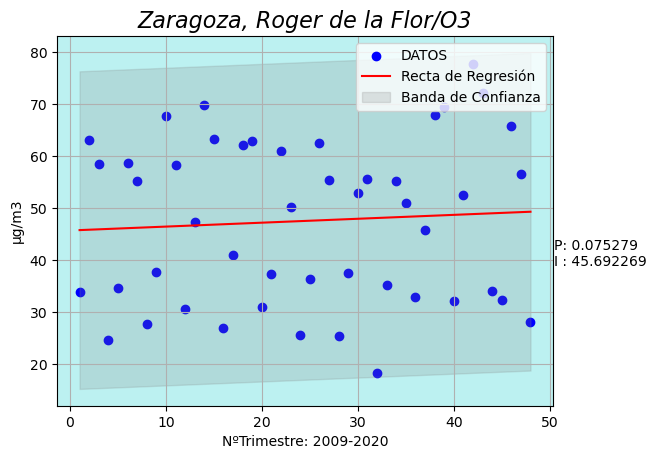

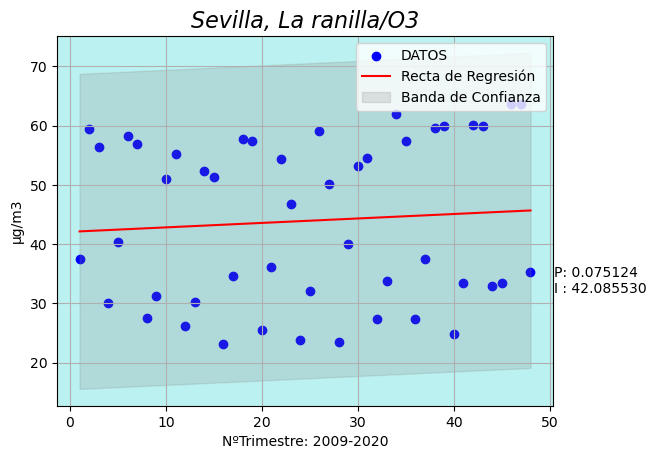

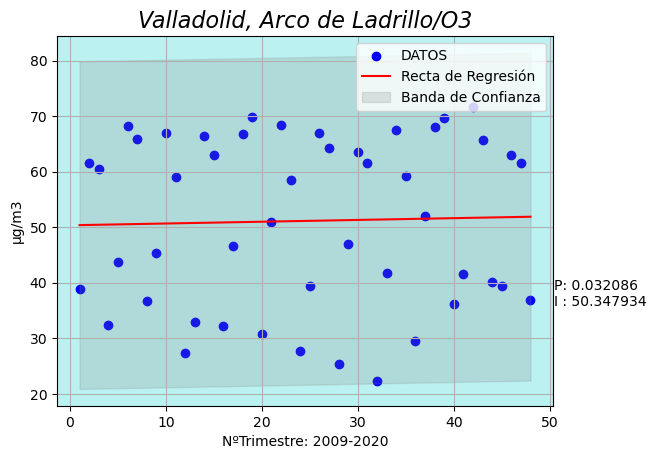

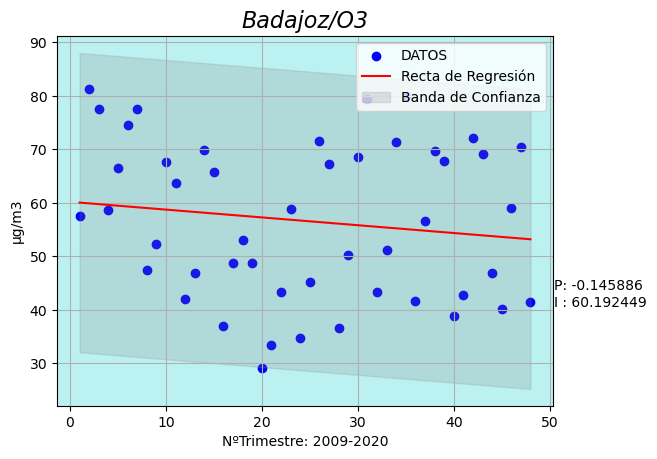

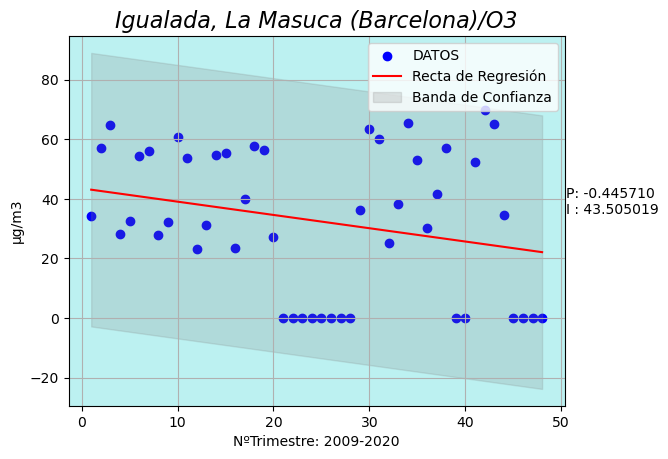

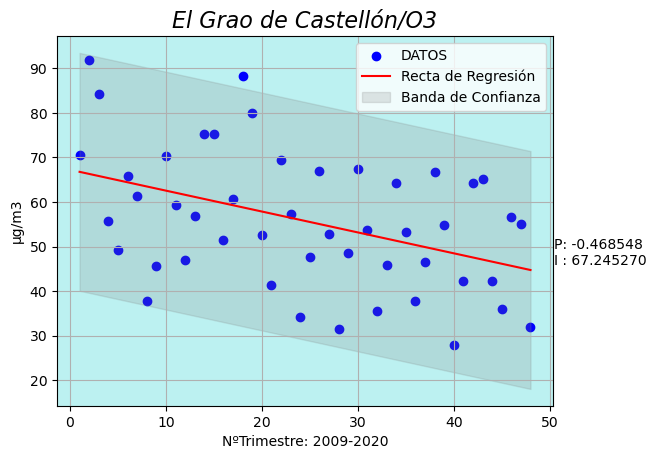

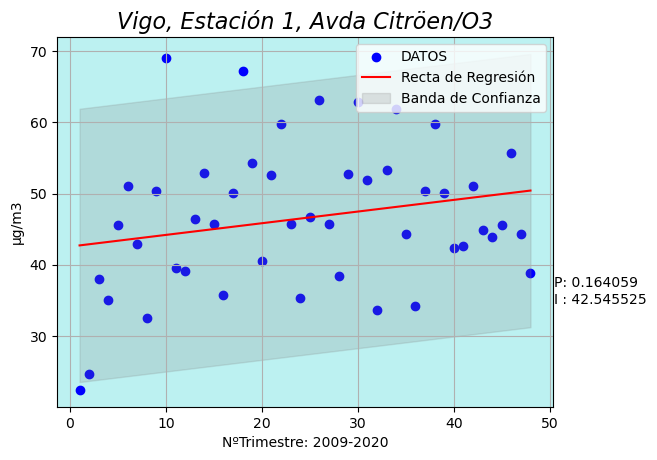

In [7]:
for chem in chems:
    for tipo, lista in dic.items():
        for place in lista:
            y = dfMM.loc[:, place + "/ " + chem]
            X = dfMM[['INDICE']].values  # Convertir a una matriz NumPy
            max=dfMM[place+"/ "+chem].max()
            model = LinearRegression()

            # Entrenar el modelo
            reg = model.fit(X, y)

            # Realizar predicciones
            pendiente = reg.coef_[0]
            interseccion = reg.intercept_
            predictions = model.predict(X)

            # Calcular el error estándar residual
            residuals = y - predictions
            mean_error = np.mean(residuals)
            std_error = np.std(residuals)

            # Calcular el intervalo de confianza
            confidence_interval = 1.96 * std_error

            # Graficar los datos y la línea de regresión
            plt.scatter(X, y, color='blue', label='DATOS')
            plt.plot(X, predictions, color='red', label='Recta de Regresión')

            # Agregar las bandas de confianza
            plt.fill_between(X.flatten(), predictions - confidence_interval, predictions + confidence_interval, color='gray', alpha=0.2, label='Banda de Confianza')

            plt.title(place + '/' + chem, fontsize=16, fontweight=500, fontstyle='oblique')
            plt.grid(True)
            plt.xlabel('NºTrimestre: 2009-2020')
            plt.ylabel('μg/m3')
            plt.annotate(f'P: {pendiente:2f}\nI : {interseccion:2f}', xy=(20, max / 2), xytext=(50.5, max / 2))
            plt.legend(loc='upper right')
            ax = plt.gca()
            ax.set_facecolor('#BCF1F1')
            #plt.savefig("C:/Users/usuario/OneDrive/Documentos/PROYECTO/GRAFICOS/"+place+"-"+chem+".jpg")
            plt.show()